# Exploratory Data Analysis and Preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import pointbiserialr
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

### Restaurunt Food Data (menu_df)

#### Exploratory Data Analysis

In [3]:
# Load master food CSV file
menu_df = pd.read_csv('./data/menu_df.csv')

print("Restaurant Data:", menu_df.shape)
menu_df.head()

Restaurant Data: (1300, 14)


restaurant_name                                          food_name  \
0  McDonald's Canada  Egg BLT McMuffin with Shredded Lettuce (McDona...   
1         McDonald's                                       Cheeseburger   
2         McDonald's                                          Hamburger   
3         McDonald's                                              Honey   
4         McDonald's                                           Hotcakes   

   serving_size serving_unit  calories  carbohydrates  sugars   fats  \
0           1.0      Serving      7.99           1.55    0.56   0.14   
1           1.0      Serving    535.31          39.24    7.16  28.66   
2           1.0      Serving    540.14          40.27     NaN  26.56   
3           1.0      Serving     63.84          17.30   17.25   0.00   
4           1.0      Serving     90.80          11.32     NaN   3.88   

   saturated_fats  cholesterol   sodium  fiber  potassium  proteins  
0            0.02         0.00     3.76   0.99     116.09      0.58  
1           14.00        95.52  1176.09   2.39     443.77     30.27  
2           10.52       122.04   791.00    NaN     569.52     34.28  
3            0.00         0.00     0.84   0.04      10.92      0.06  
4            0.85        23.60   175.60    NaN      52.80      2.56

In [4]:
# Data Overview
print("Menu Data Overview:")
print(menu_df.info())
print(menu_df.describe())

Menu Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_name  1300 non-null   object 
 1   food_name        1300 non-null   object 
 2   serving_size     1300 non-null   float64
 3   serving_unit     1300 non-null   object 
 4   calories         1300 non-null   float64
 5   carbohydrates    1268 non-null   float64
 6   sugars           1200 non-null   float64
 7   fats             1268 non-null   float64
 8   saturated_fats   1259 non-null   float64
 9   cholesterol      1254 non-null   float64
 10  sodium           1268 non-null   float64
 11  fiber            1241 non-null   float64
 12  potassium        1262 non-null   float64
 13  proteins         1268 non-null   float64
dtypes: float64(11), object(3)
memory usage: 142.3+ KB
None
       serving_size     calories  carbohydrates       sugars         fats  \


In [5]:
# Categorical Analysis
print("Top 10 Restaurants in Menu Data:")
print(menu_df['restaurant_name'].value_counts().head(10))

Top 10 Restaurants in Menu Data:
restaurant_name
Rubio's                      20
Sonic                        20
Domino's                     20
Broken Yolk Cafe             20
Daphne's California Greek    20
PF Chang's                   20
Cheesecake Factory           20
Jack in the Box              20
Pick Up Stix                 20
Cheba Hut                    20
Name: count, dtype: int64


#### Missing Values and Handling

In [6]:
# Missing Values
print("Missing values in Menu Data:")
print(menu_df.isnull().sum())

Missing values in Menu Data:
restaurant_name      0
food_name            0
serving_size         0
serving_unit         0
calories             0
carbohydrates       32
sugars             100
fats                32
saturated_fats      41
cholesterol         46
sodium              32
fiber               59
potassium           38
proteins            32
dtype: int64


In [7]:
problem_rows = menu_df[
    (menu_df['calories'] <= 0) |
    (menu_df['carbohydrates'].isna()) |
    (menu_df['fats'].isna()) |
    (menu_df['proteins'].isna())
]
print("Problematic Rows:")
print(problem_rows)

Problematic Rows:
                            restaurant_name              food_name  \
6                                McDonald's               McCrispy   
18                               McDonald's        Deluxe McCrispy   
131                            Panera Bread          Cinnascramble   
146                                  Subway            Giardiniera   
154                                  Subway                   Salt   
156                                  Subway              Subkrunch   
172                                 Chili's     Captain's Castaway   
173                                 Chili's        Casamigos 'Rita   
181                 Ike's Love & Sandwiches              359. IHOP   
232                            Olive Garden          Bottle, Light   
233                            Olive Garden        Bottle, Regular   
319                                     KFC                Twister   
332                        Church's Chicken             Hashrounds   
37

Distributions of Nutrients

The histogram and boxplot is visualized for nutrients to see how to handle missing variables

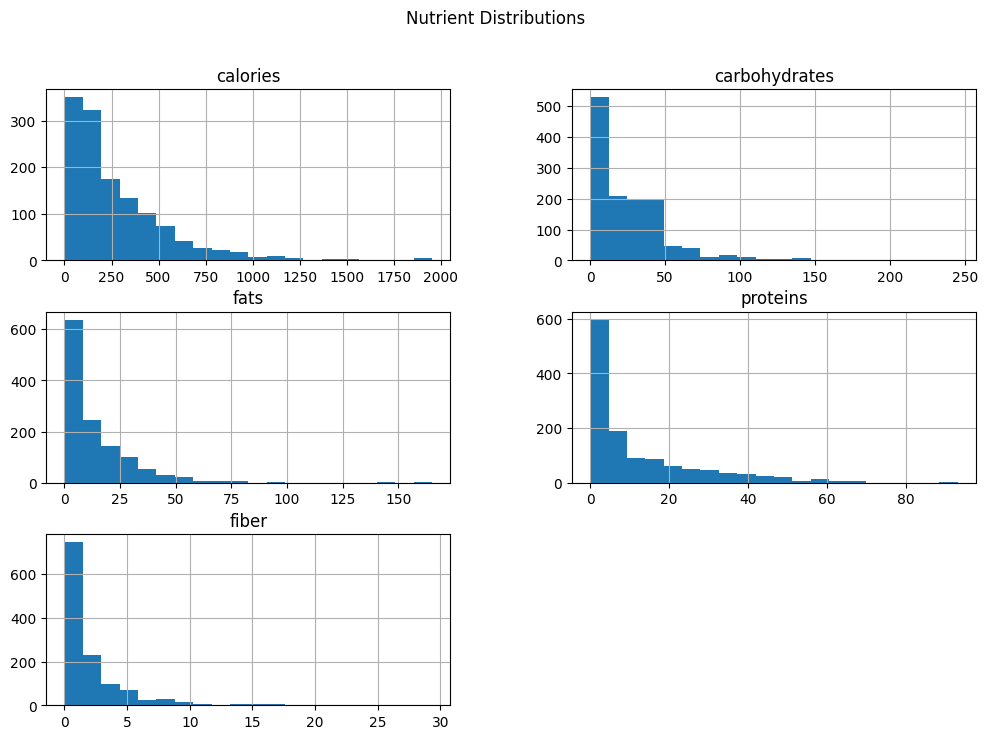

In [8]:
menu_df[['calories', 'carbohydrates', 'fats', 'proteins', 'fiber']].hist(bins=20, figsize=(12, 8))
plt.suptitle("Nutrient Distributions")
plt.show()

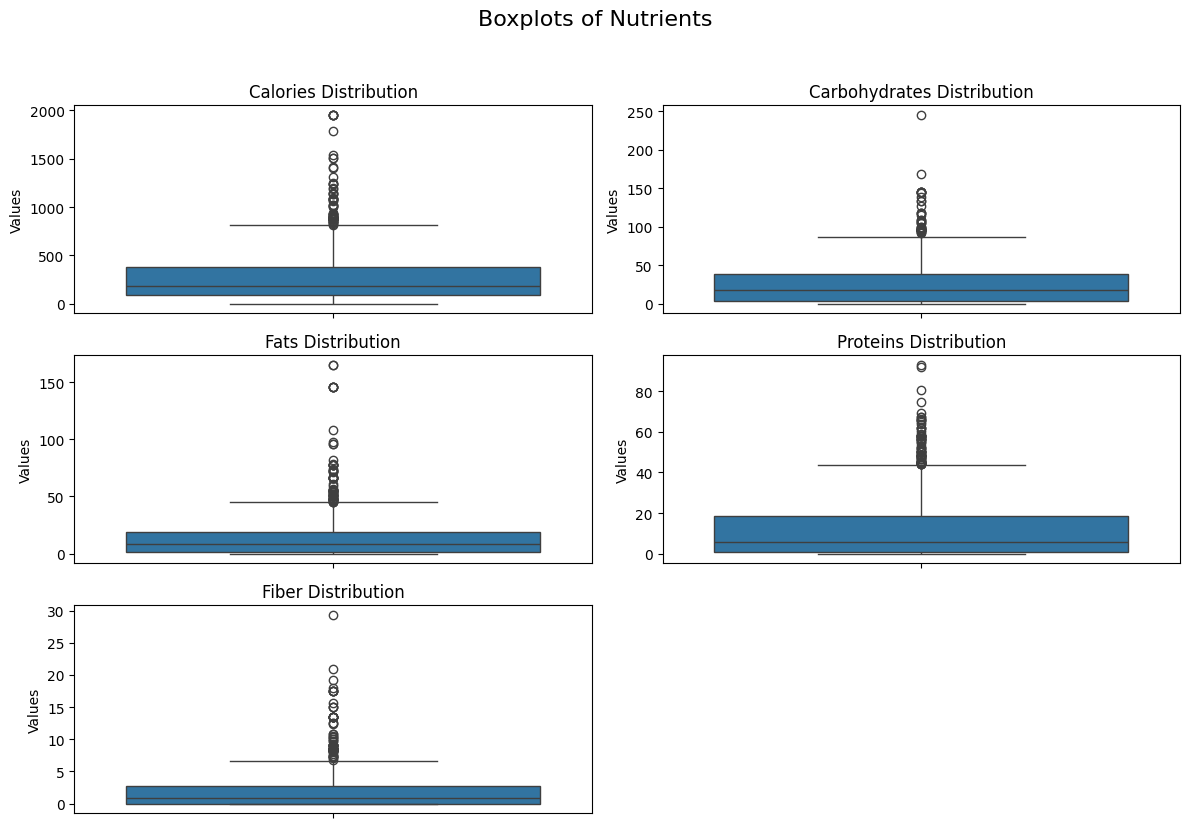

In [9]:
# 3x2 grid for the plots
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing between subplots

# List of nutrients to plot
nutrients = ['calories', 'carbohydrates', 'fats', 'proteins', 'fiber']
titles = ['Calories Distribution', 'Carbohydrates Distribution', 
          'Fats Distribution', 'Proteins Distribution', 'Fiber Distribution']

# Loop through each nutrient and plot
for i in range(len(nutrients)):
    sns.boxplot(y=menu_df[nutrients[i]], ax=axes.flat[i])  # Plot individual nutrient
    axes.flat[i].set_title(titles[i])  # Set corresponding title
    axes.flat[i].set_ylabel('Values')  # Set y-axis label

# Remove the extra subplot (6th one in this case)
if len(axes.flat) > len(nutrients):
    axes.flat[-1].axis('off')

# Show the plots
plt.suptitle('Boxplots of Nutrients', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()


Since the distributions are right-skewed, the missing values for menu_df are imputed with the median, as it is less sensitive to extreme values compared to the mean. For critical columns such as calories, carbohydrates, fats, and proteins, the global median is used to ensure consistency and accuracy, as these features are essential for the recommendation system.

For secondary columns, the missing values are first imputed by grouping by restaurant_name, as foods from the same restaurant are likely to share similar nutritional profiles. Any remaining missing values are then imputed with the global median as a fallback to ensure no data is left missing. This two-step approach provides context-aware imputation while maintaining a robust and complete dataset for modeling.

In [10]:
# Handle rows with invalid calories
menu_df = menu_df[menu_df['calories'] > 0]  # Remove rows with zero or negative calories

# Impute critical columns with median
critical_columns = ['carbohydrates', 'fats', 'proteins']
for col in critical_columns:
    menu_df[col] = menu_df[col].fillna(menu_df[col].median())  # Explicit assignment

# Impute secondary columns based on the restaurant or category median
secondary_columns = ['sugars', 'fiber', 'saturated_fats', 'cholesterol', 'potassium', 'sodium']
for col in secondary_columns:
    menu_df[col] = menu_df[col].fillna(menu_df.groupby('restaurant_name')[col].transform('median'))

# For any remaining missing values in secondary columns, use global median
for col in secondary_columns:
    menu_df[col] = menu_df[col].fillna(menu_df[col].median())

In [11]:
# recheck missing values
menu_df.isnull().sum()

restaurant_name    0
food_name          0
serving_size       0
serving_unit       0
calories           0
carbohydrates      0
sugars             0
fats               0
saturated_fats     0
cholesterol        0
sodium             0
fiber              0
potassium          0
proteins           0
dtype: int64

#### Visualizations

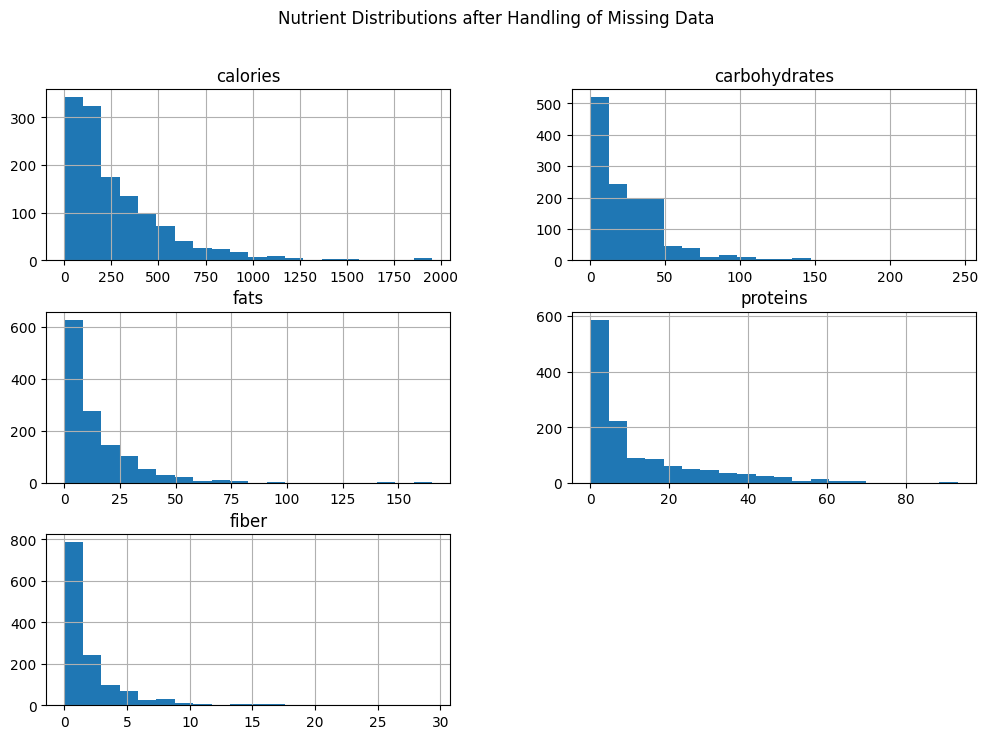

In [12]:
menu_df[['calories', 'carbohydrates', 'fats', 'proteins', 'fiber']].hist(bins=20, figsize=(12, 8))
plt.suptitle("Nutrient Distributions after Handling of Missing Data")
plt.show()

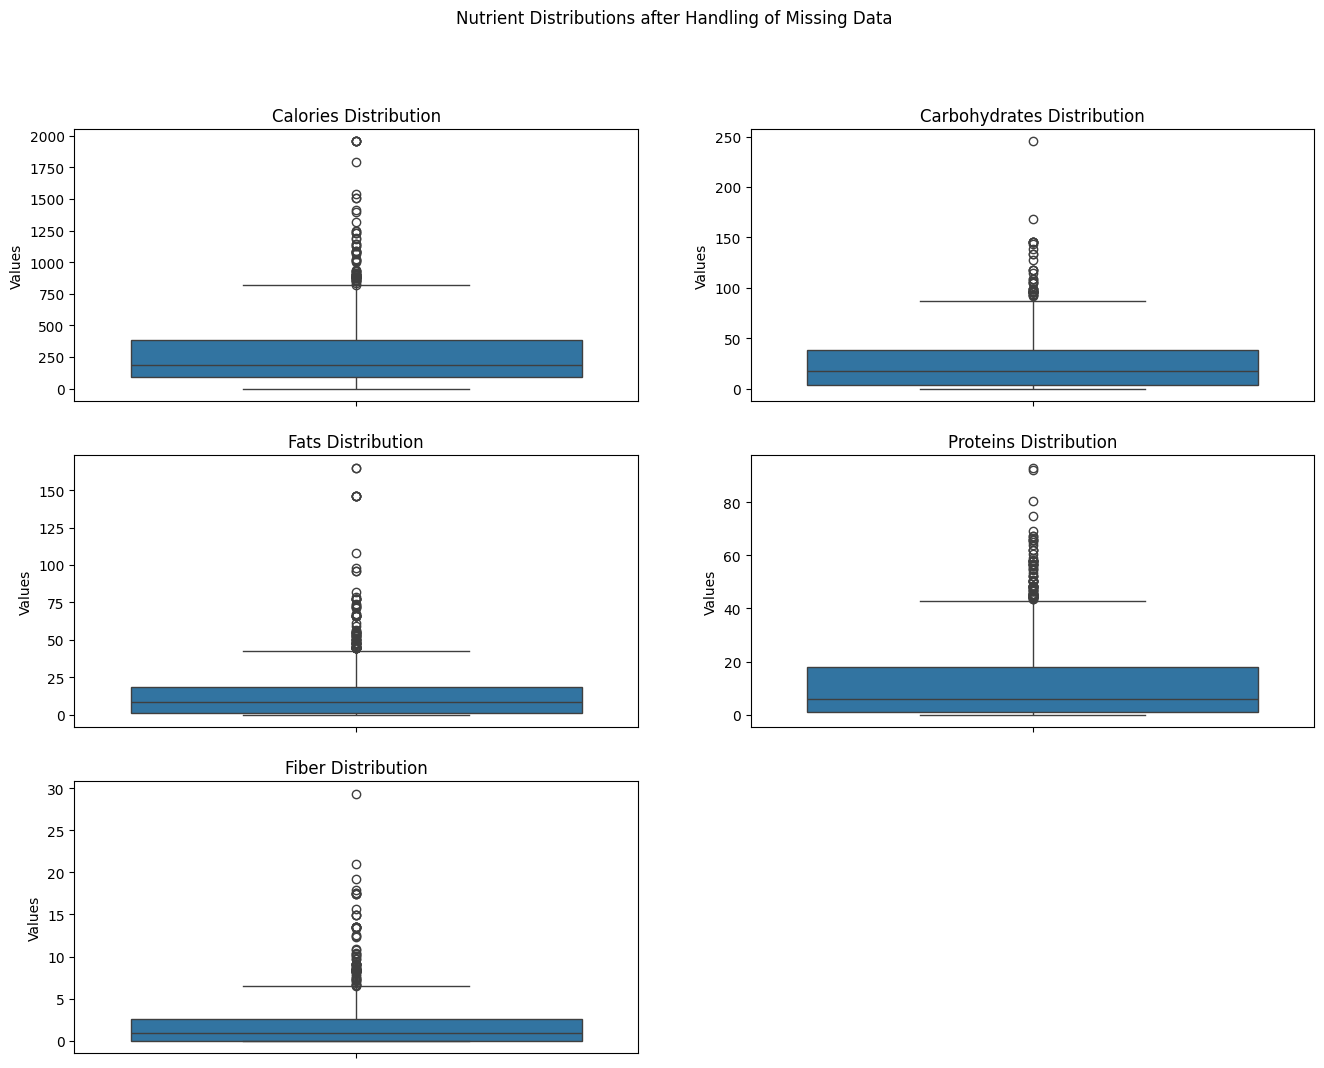

In [13]:
# 3x2 grid for boxplots
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
nutrients = ['calories', 'carbohydrates', 'fats', 'proteins', 'fiber']
titles = ['Calories', 'Carbohydrates', 'Fats', 'Proteins', 'Fiber']

for i, ax in enumerate(axes.flat[:len(nutrients)]):
    sns.boxplot(data=menu_df, y=nutrients[i], ax=ax)
    ax.set_title(f'{titles[i]} Distribution')
    ax.set_ylabel('Values')

# Remove the extra subplot (6th one in this case)
if len(axes.flat) > len(nutrients):
    axes.flat[-1].axis('off')

plt.suptitle("Nutrient Distributions after Handling of Missing Data")
plt.show()

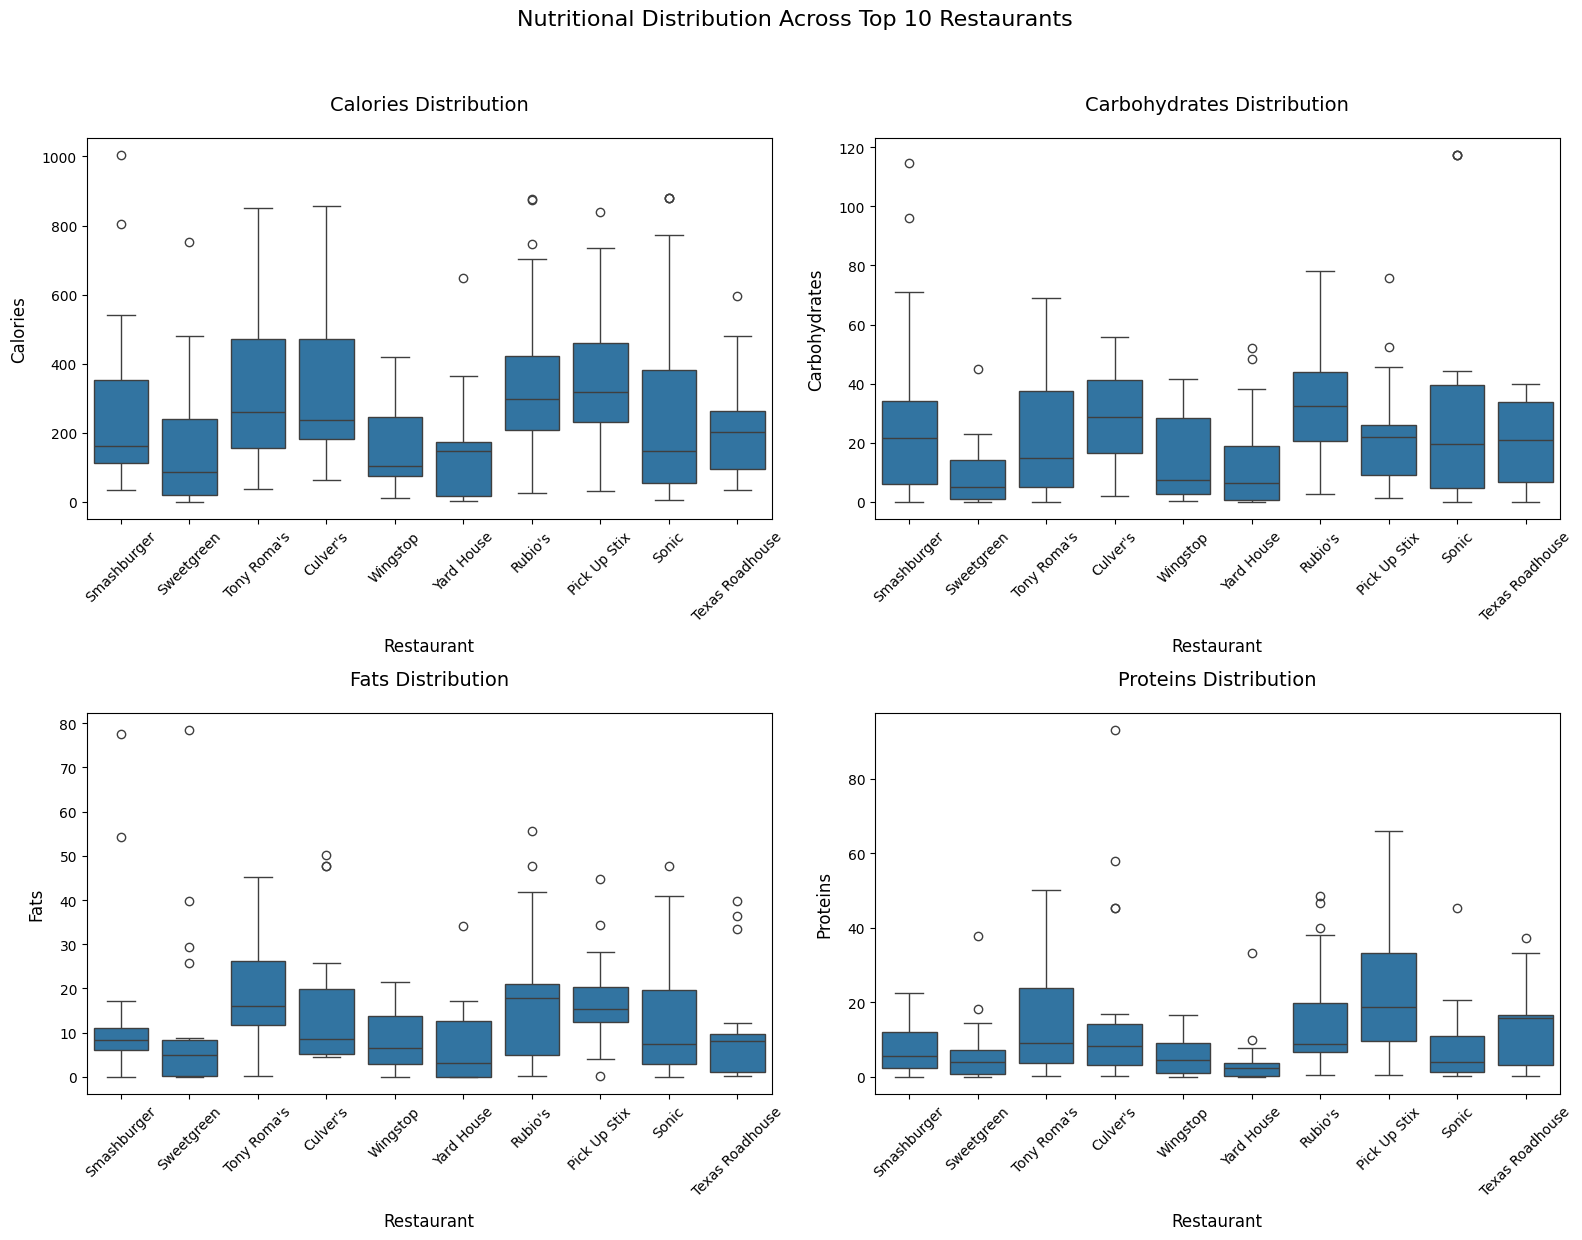

In [14]:
# Select top 10 restaurants by frequency
top_restaurants = menu_df['restaurant_name'].value_counts().head(10).index
filtered_menu_df = menu_df[menu_df['restaurant_name'].isin(top_restaurants)]

# 2x2 grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing between subplots

# List of nutrients to plot
nutrients = ['calories', 'carbohydrates', 'fats', 'proteins']
titles = ['Calories Distribution', 'Carbohydrates Distribution', 
          'Fats Distribution', 'Proteins Distribution']

# Loop through each nutrient and plot
for i, ax in enumerate(axes.flat):
    sns.boxplot(data=filtered_menu_df, x='restaurant_name', y=nutrients[i], ax=ax)
    ax.set_title(titles[i], fontsize=14, pad=20)  # padding to the title
    ax.set_xlabel('Restaurant', fontsize=12, labelpad=10)  # padding to the x-label
    ax.set_ylabel(nutrients[i].capitalize(), fontsize=12, labelpad=10)  # padding to the y-label
    ax.tick_params(axis='x', rotation=45)

# Show the plots
plt.suptitle('Nutritional Distribution Across Top 10 Restaurants', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()


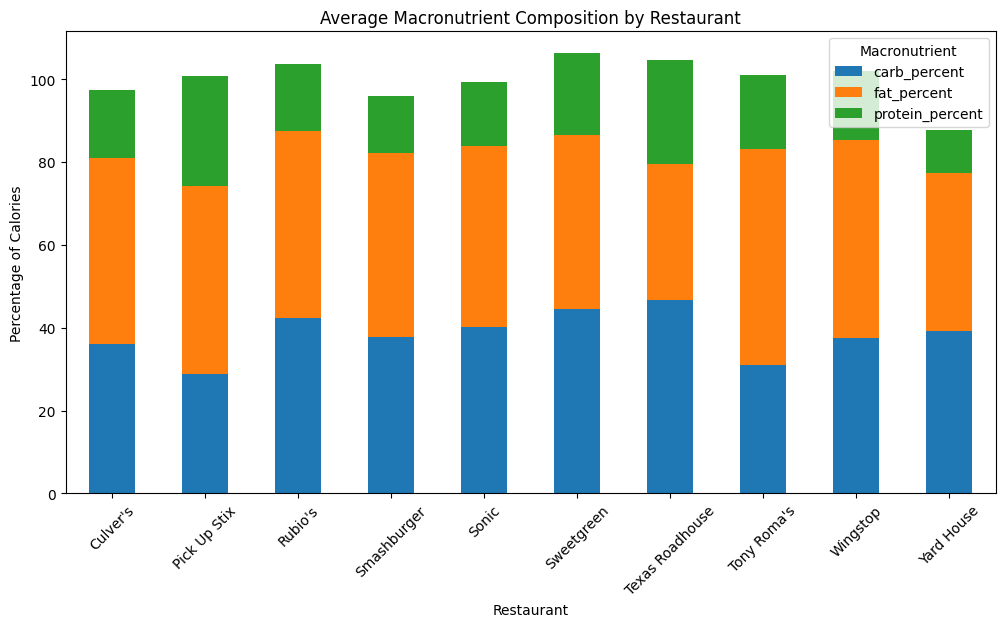

In [15]:
# Calculate macronutrient percentages
menu_df['carb_percent'] = (menu_df['carbohydrates'] * 4) / menu_df['calories'] * 100
menu_df['fat_percent'] = (menu_df['fats'] * 9) / menu_df['calories'] * 100
menu_df['protein_percent'] = (menu_df['proteins'] * 4) / menu_df['calories'] * 100

# Filter for top restaurants
stacked_data = menu_df[menu_df['restaurant_name'].isin(top_restaurants)][
    ['restaurant_name', 'carb_percent', 'fat_percent', 'protein_percent']
].groupby('restaurant_name').mean()

# Plot stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Macronutrient Composition by Restaurant')
plt.ylabel('Percentage of Calories')
plt.xlabel('Restaurant')
plt.legend(title='Macronutrient')
plt.xticks(rotation=45)
plt.show()

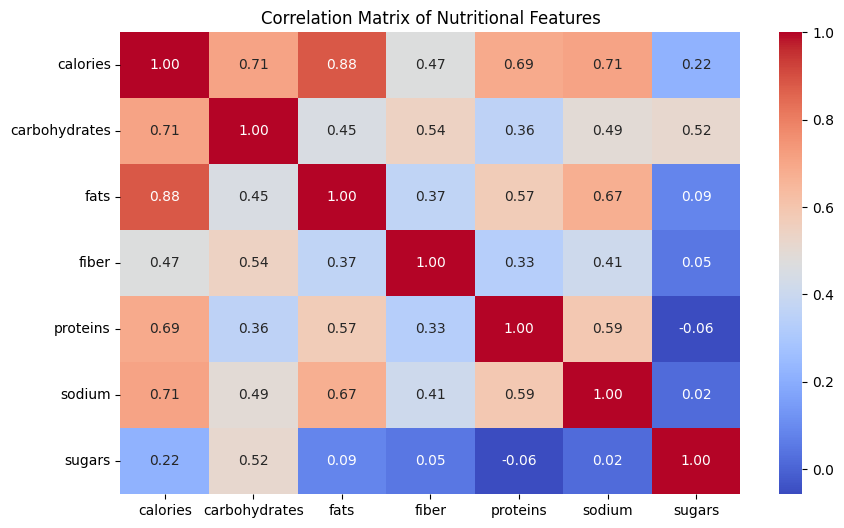

In [16]:
# Calculate correlation
corr_matrix = menu_df[['calories', 'carbohydrates', 'fats', 'fiber', 'proteins', 'sodium', 'sugars']].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Nutritional Features')
plt.show()

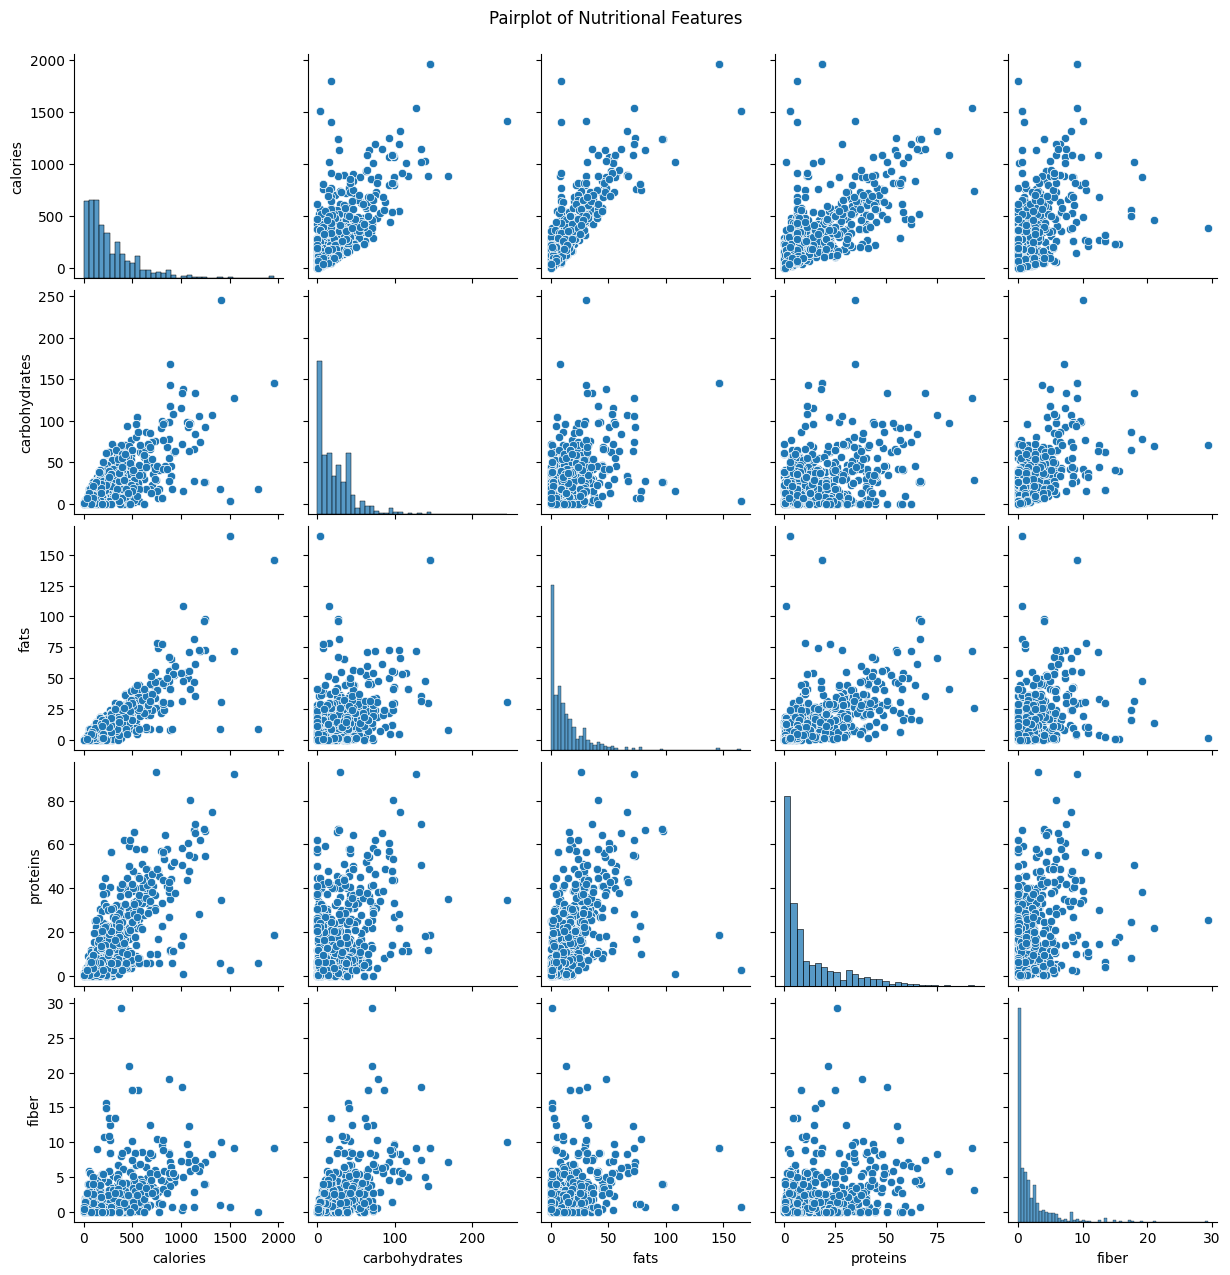

In [17]:
# pairplot to visualize relationships between numerical variables
sns.pairplot(menu_df[['calories', 'carbohydrates', 'fats', 'proteins', 'fiber']])
plt.suptitle('Pairplot of Nutritional Features', y=1.02)
plt.show()

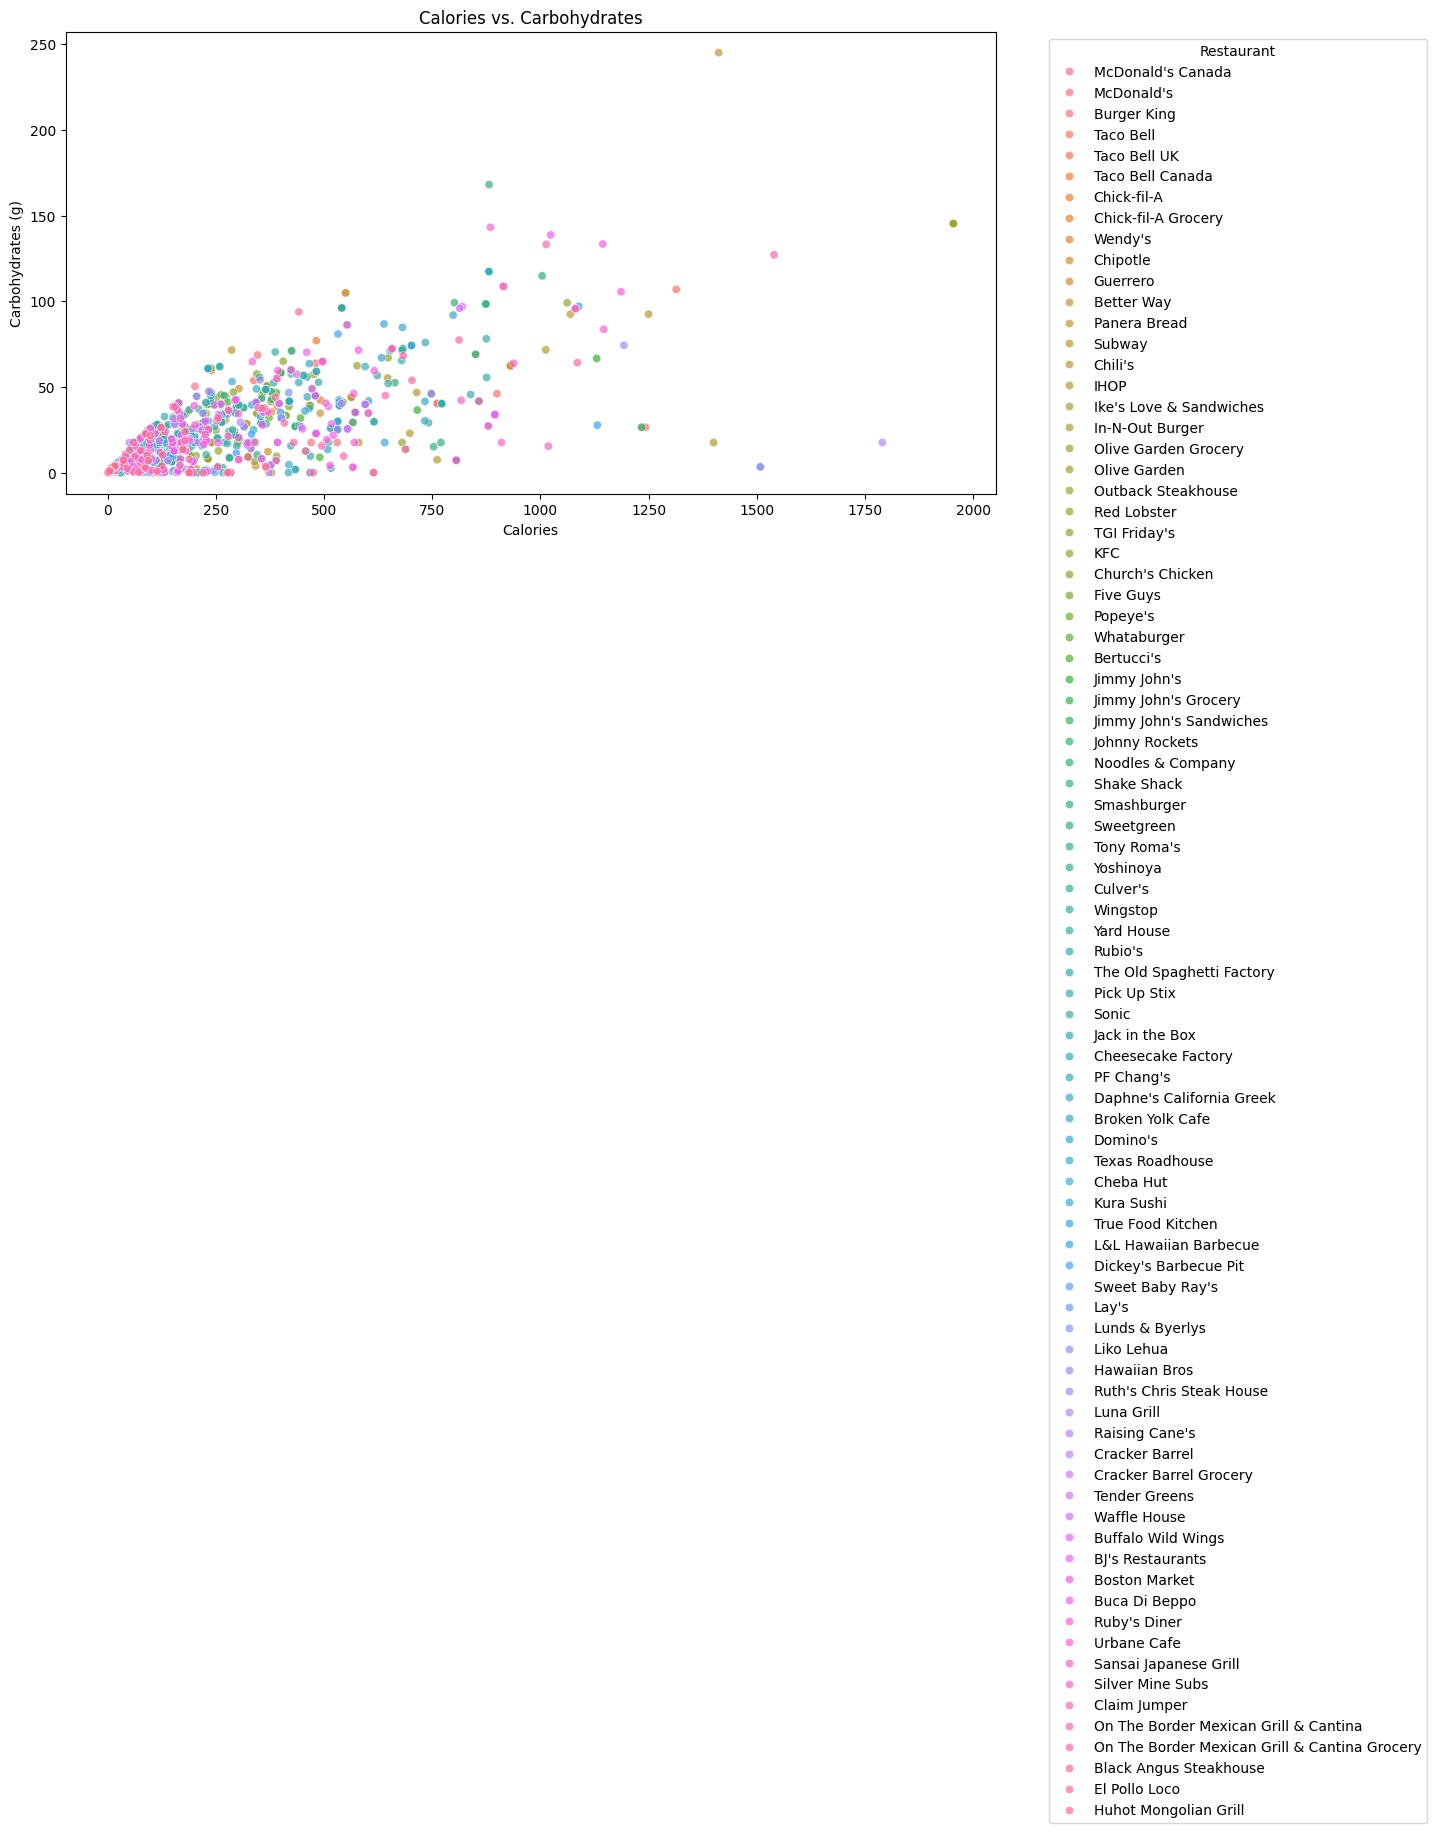

In [18]:
# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=menu_df, x='calories', y='carbohydrates', hue='restaurant_name', alpha=0.7)
plt.title('Calories vs. Carbohydrates')
plt.xlabel('Calories')
plt.ylabel('Carbohydrates (g)')
plt.legend(title='Restaurant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Preprocessing

Calculate Suitability Scores

In [19]:
# Set weights based on nutritional importance
carb_weight = 0.5
sugar_weight = 0.3
fiber_weight = 0.1
protein_weight = 0.1

In [20]:
# Set ideal nutritional values
carb_goal = 52.5
sugar_goal = 7.5
fiber_goal = 7.5
protein_goal = 20

In [21]:
# Create function to calculate suitability score
def suitability_score(carbohydrates, sugars, fiber, proteins):
    # Check if any required value is missing
    if pd.isna(carbohydrates) or pd.isna(sugars) or pd.isna(fiber) or pd.isna(proteins):
        # Return -1 as an indicator that the score couldn't be calculated
        return -1
        
    # Make sure score doesn't drop below 0
    carb_score = 1 - abs(carbohydrates - carb_goal) / carb_goal
    carb_score = max(0, carb_score)
    
    # Penalize high sugar content
    sugar_score = 1 - sugars / sugar_goal
    sugar_score = max(0, sugar_score)

    # Cap fiber_score at 1 if >= fiber_goal
    fiber_score = min(fiber / fiber_goal, 1)

    # Cap protein_score at 1 if >= protein_goal
    protein_score = min(proteins / protein_goal, 1)

    score = (carb_weight * carb_score) + (sugar_weight * sugar_score) + (fiber_weight * fiber_score) + (protein_weight * protein_score)

    return round(score, 3)

In [22]:
# Create suitability_score column
menu_df['score'] = menu_df.apply(lambda row: suitability_score(row['carbohydrates'], row['sugars'], row['fiber'], row['proteins']), axis=1)
menu_df.head()

restaurant_name                                          food_name  \
0  McDonald's Canada  Egg BLT McMuffin with Shredded Lettuce (McDona...   
1         McDonald's                                       Cheeseburger   
2         McDonald's                                          Hamburger   
3         McDonald's                                              Honey   
4         McDonald's                                           Hotcakes   

   serving_size serving_unit  calories  carbohydrates  sugars   fats  \
0           1.0      Serving      7.99           1.55    0.56   0.14   
1           1.0      Serving    535.31          39.24    7.16  28.66   
2           1.0      Serving    540.14          40.27    7.16  26.56   
3           1.0      Serving     63.84          17.30   17.25   0.00   
4           1.0      Serving     90.80          11.32    7.16   3.88   

   saturated_fats  cholesterol   sodium  fiber  potassium  proteins  \
0            0.02         0.00     3.76   0.99     116.09      0.58   
1           14.00        95.52  1176.09   2.39     443.77     30.27   
2           10.52       122.04   791.00   0.03     569.52     34.28   
3            0.00         0.00     0.84   0.04      10.92      0.06   
4            0.85        23.60   175.60   0.03      52.80      2.56   

   carb_percent  fat_percent  protein_percent  score  
0     77.596996    15.769712        29.036295  0.308  
1     29.321328    48.185164        22.618670  0.519  
2     29.821898    44.255193        25.386011  0.498  
3    108.395990     0.000000         0.375940  0.166  
4     49.867841    38.458150        11.277533  0.135

In [23]:
# Save the Preprocessed DataFrame as a CSV file in repo
data_dir = './preprocessed_data/'
menu_df.to_csv(data_dir + 'menu_df.csv', index=False)

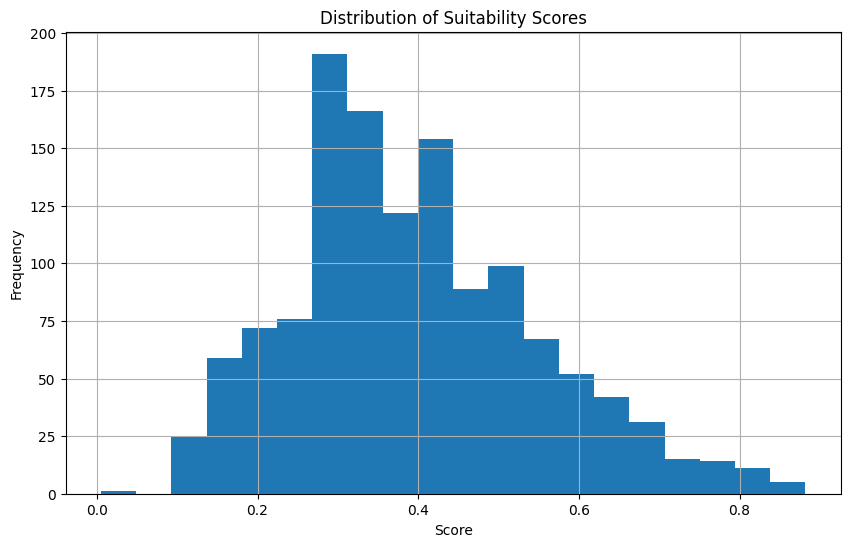

In [24]:
plt.figure(figsize=(10, 6))
menu_df['score'].hist(bins=20)
plt.title('Distribution of Suitability Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

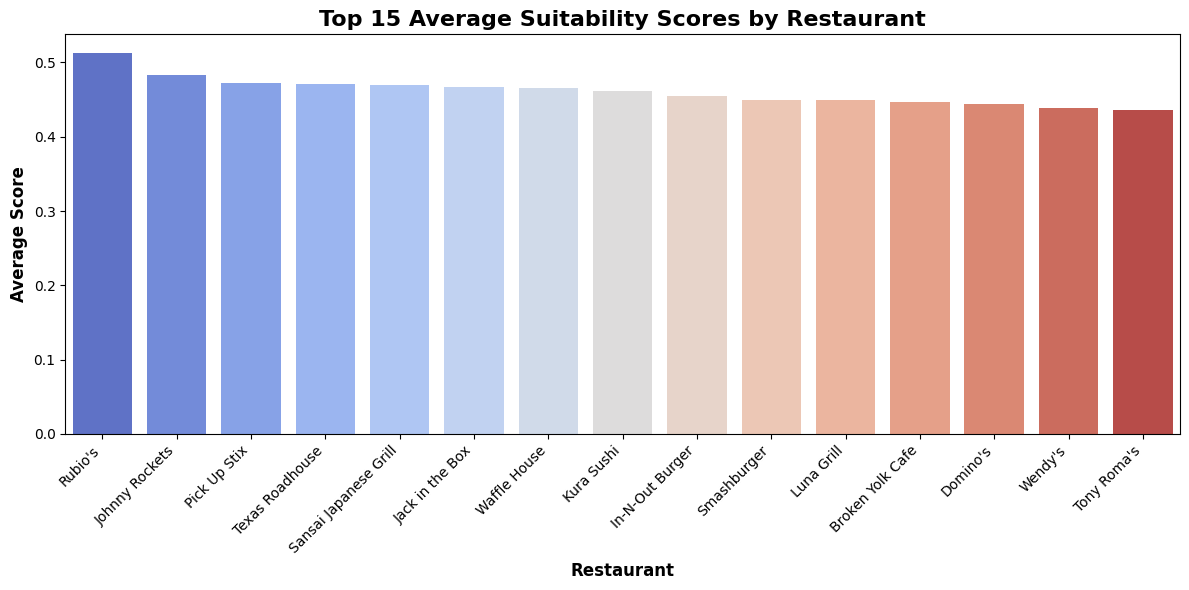

In [25]:
# Subset restaurants with more than 10 records
menu_df_sub = menu_df.groupby('restaurant_name').filter(lambda x: len(x) > 10)

# Calculate the average suitability scores for each restaurant
restaurant_scores_head = menu_df_sub.groupby('restaurant_name')['score'].mean().sort_values(ascending=False).reset_index().head(15)

# Plot the average suitability scores
plt.figure(figsize=(12, 6))
sns.barplot(
    data=restaurant_scores_head, 
    x='restaurant_name', 
    y='score', 
    palette='coolwarm',
    hue='restaurant_name',  # Assign hue to match the x-axis variable
    dodge=False  # Disable dodging since it's redundant here
)

# Add title and axis labels with custom font sizes
plt.title('Top 15 Average Suitability Scores by Restaurant', fontsize=16, weight='bold')
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.xlabel('Restaurant', fontsize=12, weight='bold')
plt.ylabel('Average Score', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

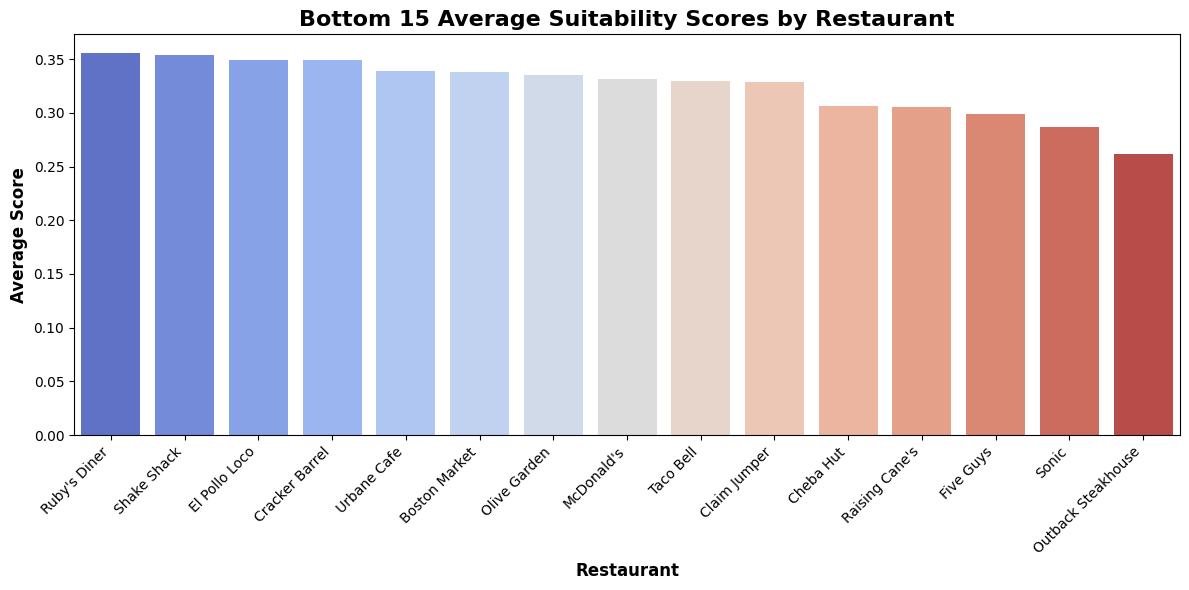

In [26]:
# Calculate the average suitability scores for each restaurant
restaurant_scores_tail = menu_df_sub.groupby('restaurant_name')['score'].mean().sort_values(ascending=False).reset_index().tail(15)

# Plot the average suitability scores
plt.figure(figsize=(12, 6))
sns.barplot(
    data=restaurant_scores_tail, 
    x='restaurant_name', 
    y='score', 
    palette='coolwarm',
    hue='restaurant_name',  # Assign hue to match the x-axis variable
    dodge=False  # Disable dodging since it's redundant here
)

# Add title and axis labels with custom font sizes
plt.title('Bottom 15 Average Suitability Scores by Restaurant', fontsize=16, weight='bold')
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.xlabel('Restaurant', fontsize=12, weight='bold')
plt.ylabel('Average Score', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

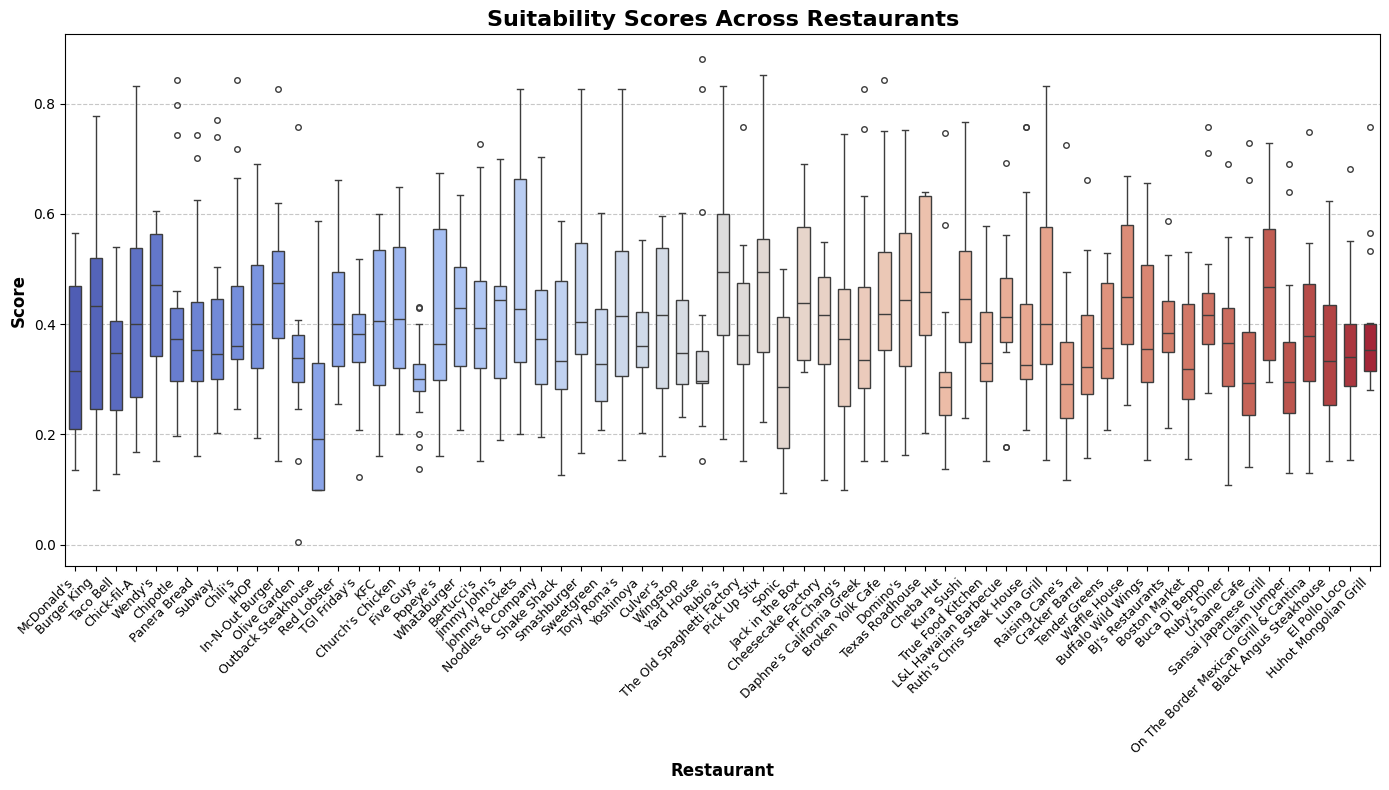

In [27]:
plt.figure(figsize=(14, 8))

# Create a boxplot with customizations
sns.boxplot(
    data=menu_df_sub, 
    x='restaurant_name', 
    y='score', 
    hue='restaurant_name',  # Set hue to match `x` for compatibility with the palette
    dodge=False,  # Prevent overlapping due to hue
    palette='coolwarm', 
    width=0.6,  
    fliersize=4  
)

# Add title and axis labels with custom font sizes
plt.title('Suitability Scores Across Restaurants', fontsize=16, weight='bold')
plt.xticks(rotation=45, fontsize=9, ha='right')  # Rotate and align x-axis labels
plt.xlabel('Restaurant', fontsize=12, weight='bold')
plt.ylabel('Score', fontsize=12, weight='bold')

# Add gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Ensure everything fits well
plt.show()

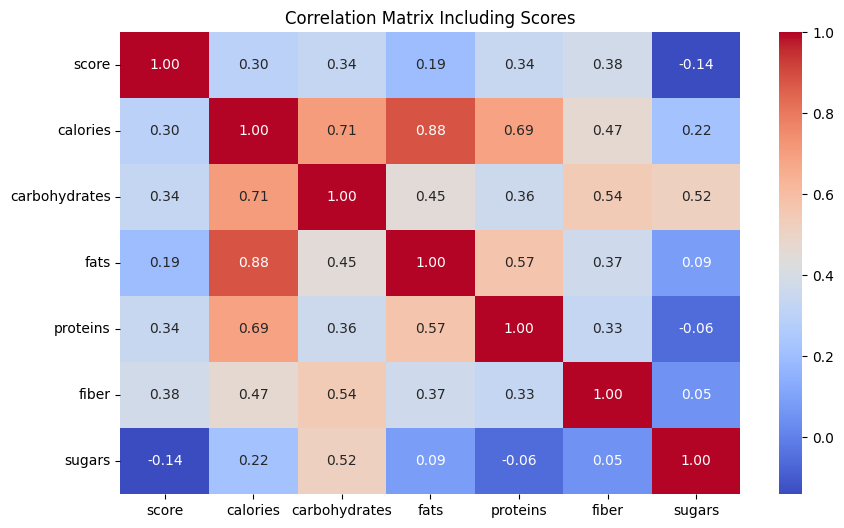

In [28]:
corr_matrix = menu_df[['score', 'calories', 'carbohydrates', 'fats', 'proteins', 'fiber', 'sugars']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Including Scores')
plt.show()

### Individual Food Data (individual_foods_df)

#### Exploratory Data Analysis 

In [29]:
# Load master food CSV file
individual_foods_df = pd.read_csv('./data/individual_foods.csv')

print("Individual Data:", individual_foods_df.shape)
individual_foods_df.head()

Individual Data: (700, 11)


food_name          category description          brand  \
0  Broccoli  Individual Foods    BROCCOLI    GREAT VALUE   
1  Broccoli  Individual Foods    BROCCOLI      EAT SMART   
2  Broccoli  Individual Foods    BROCCOLI            NaN   
3  Broccoli  Individual Foods    BROCCOLI          MAMBO   
4  Broccoli  Individual Foods    BROCCOLI  GOOD & GATHER   

                     food_category  calories  carbohydrates  fiber  sugars  \
0                Frozen Vegetables      24.0           4.71    3.5    1.18   
1  Pre-Packaged Fruit & Vegetables      29.0           4.71    3.5    2.35   
2  Pre-Packaged Fruit & Vegetables      34.0           5.41    2.0    1.35   
3                Frozen Vegetables      29.0           3.53    2.4    1.18   
4                Frozen Vegetables      24.0           4.71    3.5    1.18   

   fats  proteins  
0  0.00      2.35  
1  0.00      3.53  
2  0.34      2.70  
3  0.00      1.18  
4  0.00      2.35

In [30]:
# Data Overview
print("Individual Foods Data Overview:")
print(individual_foods_df.info())
print(individual_foods_df.describe())

Individual Foods Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   food_name      700 non-null    object 
 1   category       700 non-null    object 
 2   description    700 non-null    object 
 3   brand          491 non-null    object 
 4   food_category  700 non-null    object 
 5   calories       659 non-null    float64
 6   carbohydrates  685 non-null    float64
 7   fiber          599 non-null    float64
 8   sugars         608 non-null    float64
 9   fats           691 non-null    float64
 10  proteins       690 non-null    float64
dtypes: float64(6), object(5)
memory usage: 60.3+ KB
None
          calories  carbohydrates       fiber      sugars        fats  \
count   659.000000     685.000000  599.000000  608.000000  691.000000   
mean    290.757208      21.097956    4.609117    6.228635   13.816298   
std     365.03

In [31]:
# Categorical Analysis
print("Top 10 Food Categories in Individual Foods Data:")
print(individual_foods_df['food_category'].value_counts().head(10))

Top 10 Food Categories in Individual Foods Data:
food_category
Pre-Packaged Fruit & Vegetables             57
Popcorn, Peanuts, Seeds & Related Snacks    54
Vegetables and Vegetable Products           35
Cheese                                      30
Herbs & Spices                              26
Frozen Vegetables                           26
Other Grains & Seeds                        24
Breads & Buns                               18
Frozen Fruit & Fruit Juice Concentrates     18
Canned & Bottled Beans                      16
Name: count, dtype: int64


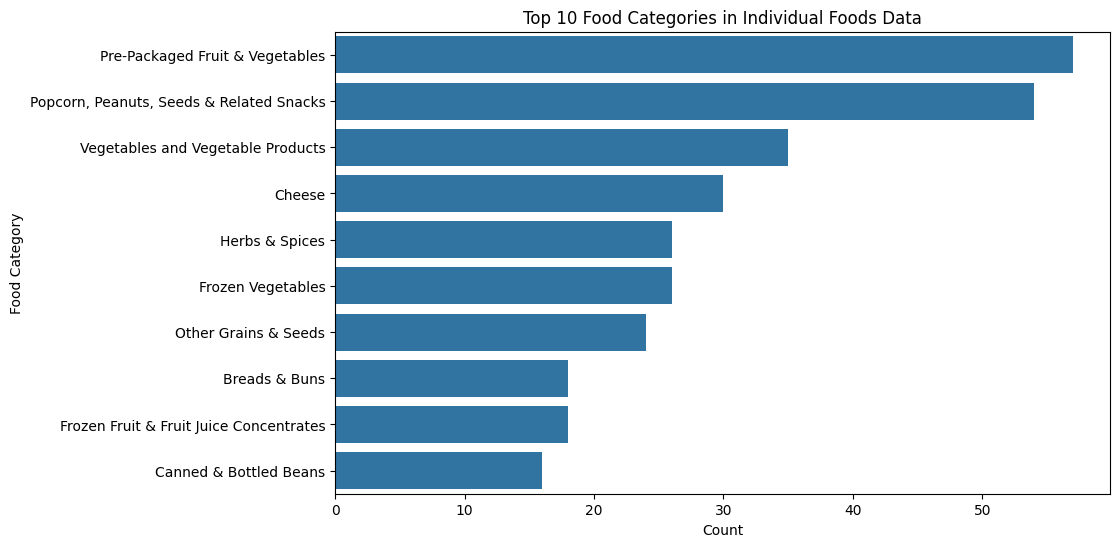

In [32]:
# Top 10 Food Categories
top_food_categories = individual_foods_df['food_category'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_food_categories.values, y=top_food_categories.index)
plt.title("Top 10 Food Categories in Individual Foods Data")
plt.xlabel("Count")
plt.ylabel("Food Category")
plt.show()

#### Missing Values and Handling

In [33]:
# Missing Values
print("Missing values in Individual Foods Data:")
print(individual_foods_df.isnull().sum())

Missing values in Individual Foods Data:
food_name          0
category           0
description        0
brand            209
food_category      0
calories          41
carbohydrates     15
fiber            101
sugars            92
fats               9
proteins          10
dtype: int64


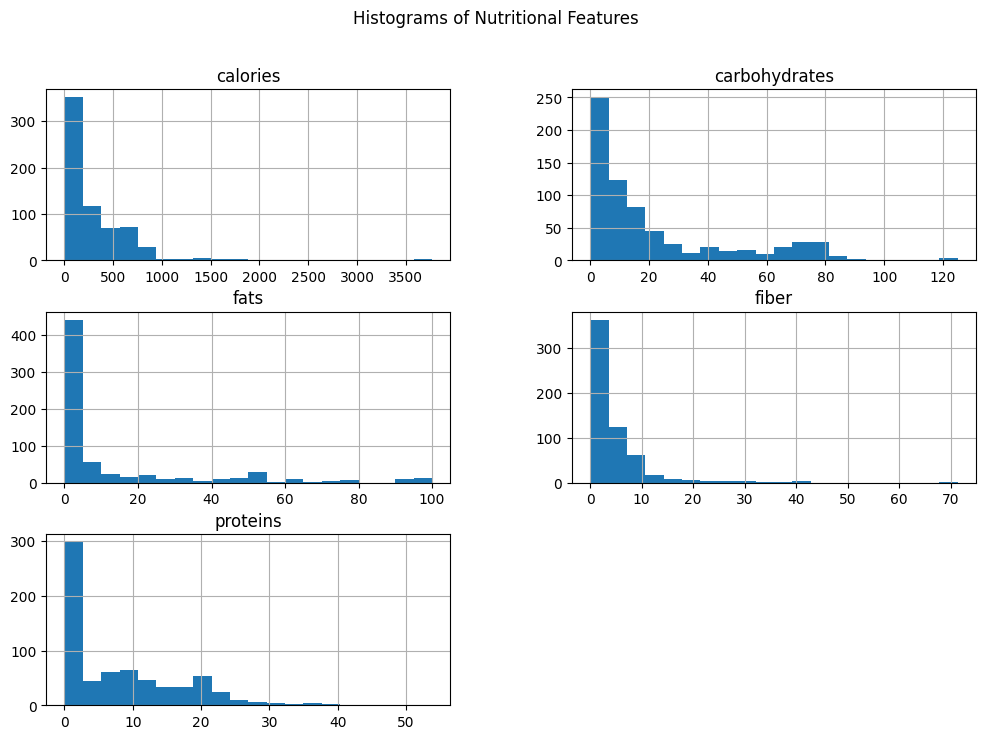

In [34]:
# Distribution of Numerical Columns
individual_foods_df.hist(column=['calories', 'carbohydrates', 'fats', 'fiber', 'proteins'], bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Nutritional Features")
plt.show()

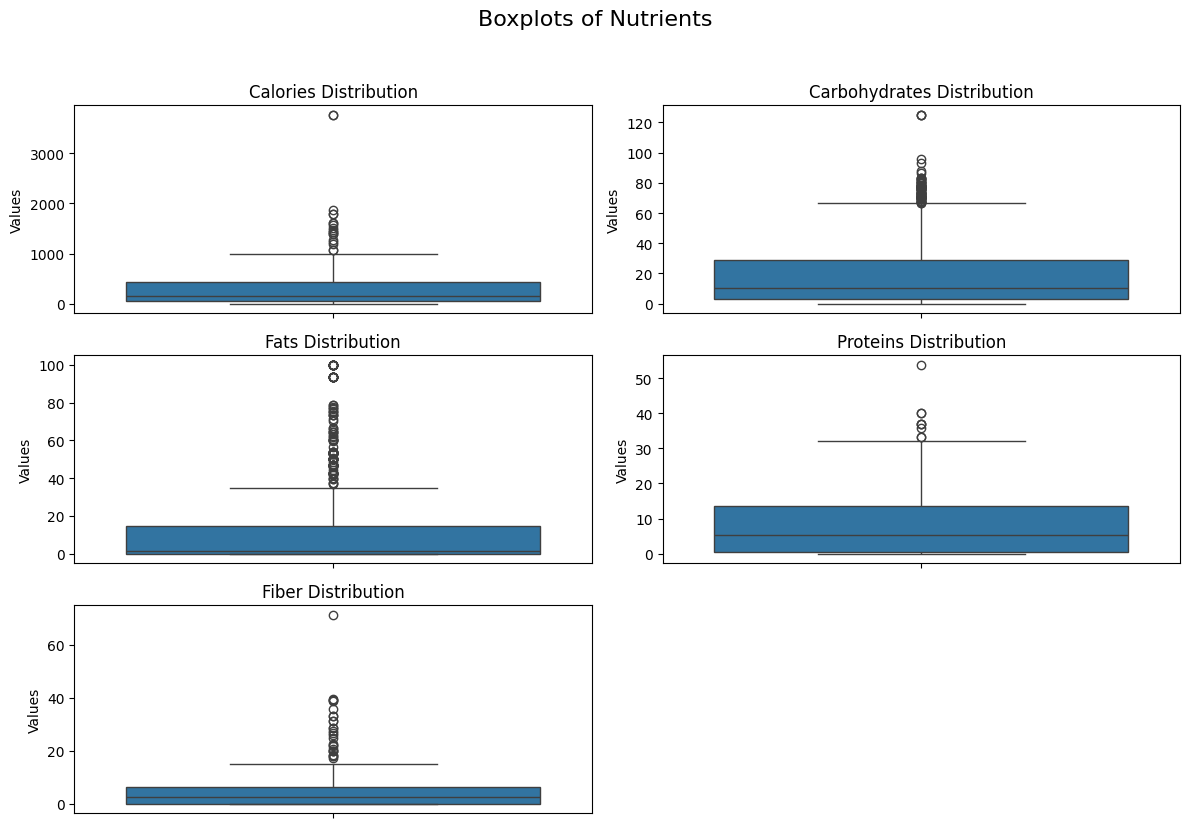

In [35]:
# box plots 
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing between subplots

# List of nutrients to plot
nutrients = ['calories', 'carbohydrates', 'fats', 'proteins', 'fiber']
titles = ['Calories Distribution', 'Carbohydrates Distribution', 
          'Fats Distribution', 'Proteins Distribution', 'Fiber Distribution']

# Loop through each nutrient and plot
for i in range(len(nutrients)):
    sns.boxplot(y=individual_foods_df[nutrients[i]], ax=axes.flat[i])  # Plot individual nutrient
    axes.flat[i].set_title(titles[i])  # Set corresponding title
    axes.flat[i].set_ylabel('Values')  # Set y-axis label

# Remove the extra subplot (6th one in this case)
if len(axes.flat) > len(nutrients):
    axes.flat[-1].axis('off')

# Show the plots
plt.suptitle('Boxplots of Nutrients', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

Since the distributions of nutritional features are right-skewed, the median is chosen for imputing missing values because it is robust to outliers and provides a more accurate central tendency for skewed data. To ensure contextually relevant imputations, the median is calculated and applied within each food_category, as foods within the same category are likely to have similar nutritional profiles. This approach helps maintain the integrity of the data and ensures that the imputed values align closely with the characteristics of similar foods, making the dataset more reliable for analysis and modeling.

In [36]:
# Impute numerical columns with the median grouped by 'food_category'
numerical_columns = ['calories', 'carbohydrates', 'fats', 'fiber', 'sugars', 'proteins']

for col in numerical_columns:
    individual_foods_df[col] = individual_foods_df.groupby('food_category')[col].transform(
        lambda x: x.fillna(x.median())
    )

# Handle remaining missing values with the global median for each column
for col in numerical_columns:
    individual_foods_df[col] = individual_foods_df[col].fillna(individual_foods_df[col].median())

# Impute the 'brand' column with 'Unknown'
individual_foods_df['brand'] = individual_foods_df['brand'].fillna('Unknown')


In [37]:
# Verify that no missing values remain
print(individual_foods_df.isnull().sum())

food_name        0
category         0
description      0
brand            0
food_category    0
calories         0
carbohydrates    0
fiber            0
sugars           0
fats             0
proteins         0
dtype: int64


#### Visualizations

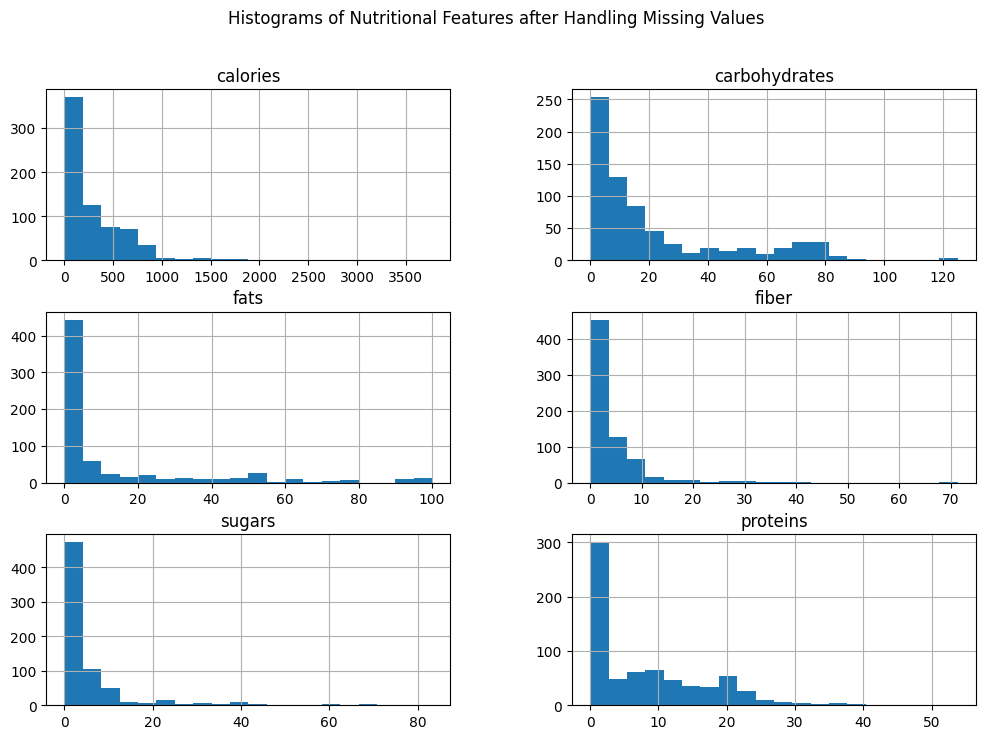

In [38]:
# Histograms
individual_foods_df[['calories', 'carbohydrates', 'fats', 'fiber', 'sugars', 'proteins']].hist(
    bins=20, figsize=(12, 8)
)
plt.suptitle("Histograms of Nutritional Features after Handling Missing Values")
plt.show()

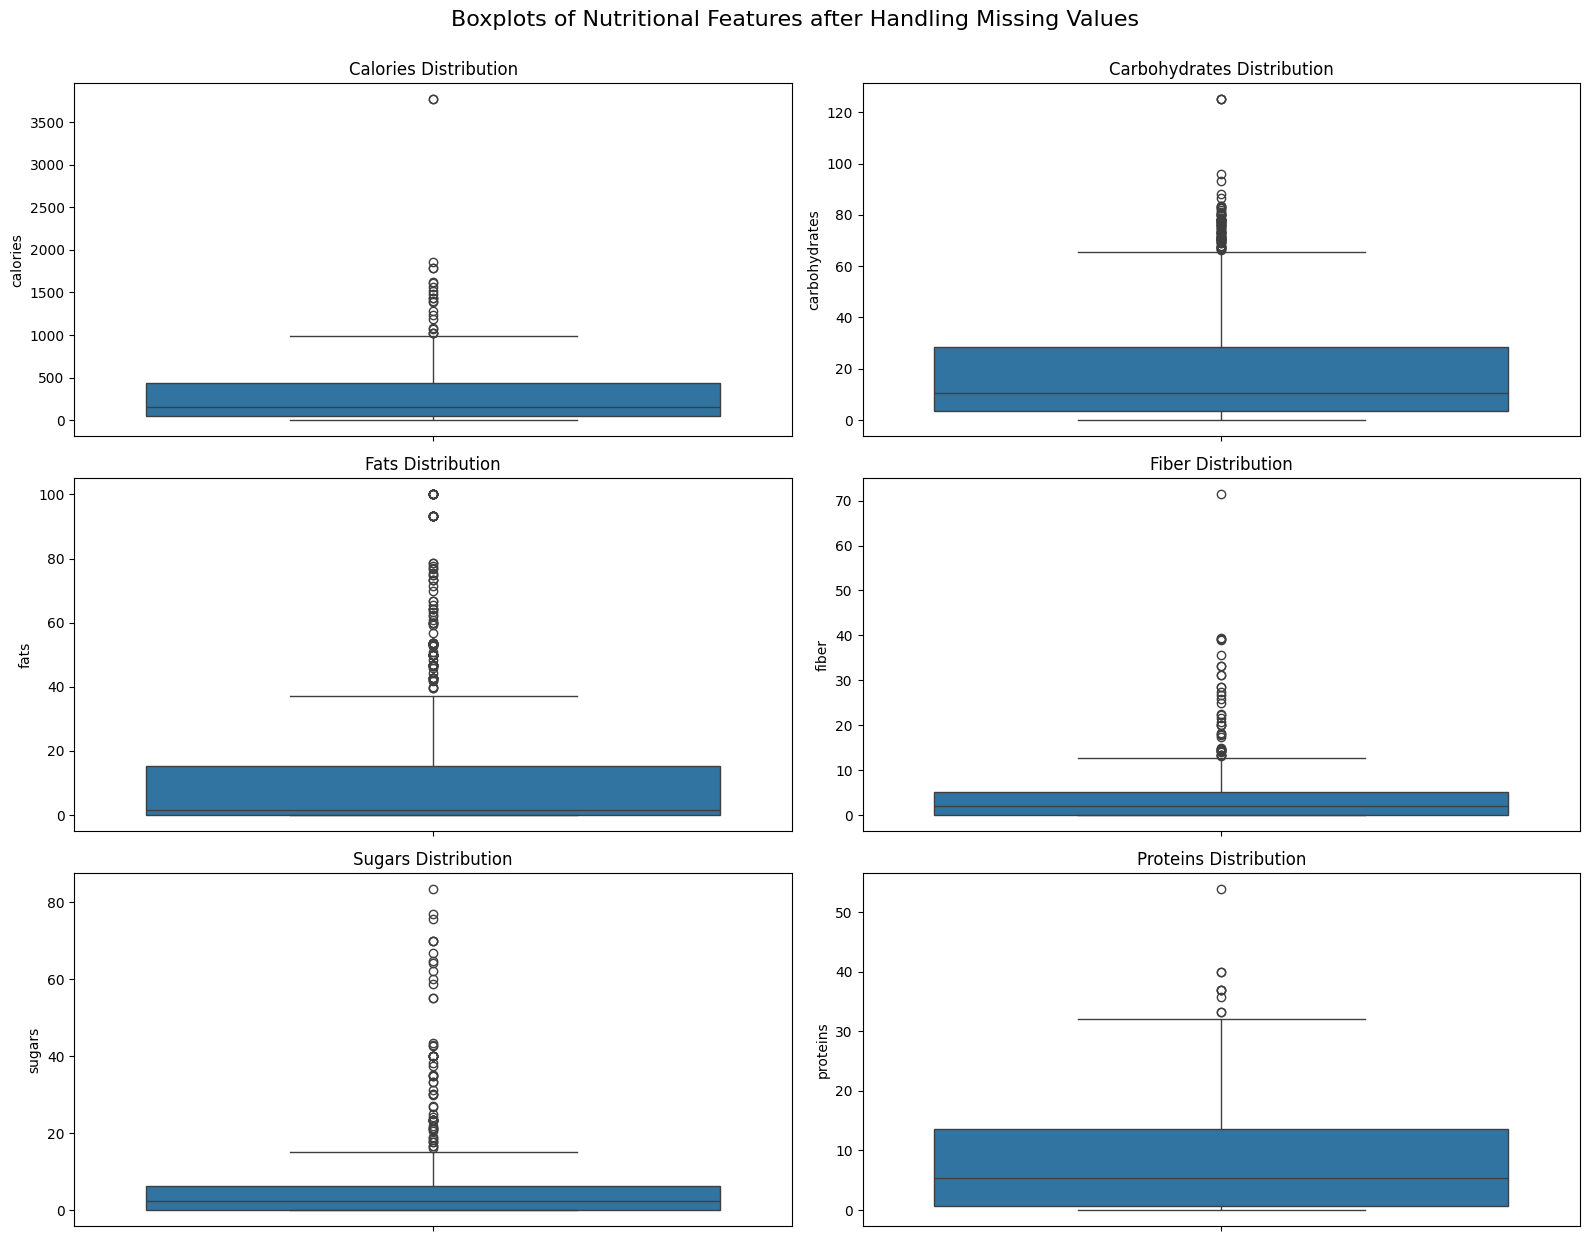

In [39]:
# Boxplots
numerical_columns = ['calories', 'carbohydrates', 'fats', 'fiber', 'sugars', 'proteins']
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=individual_foods_df, y=col, ax=axes.flat[i])
    axes.flat[i].set_title(f"{col.capitalize()} Distribution")
plt.tight_layout()
plt.suptitle("Boxplots of Nutritional Features after Handling Missing Values", fontsize=16, y=1.03)
plt.show()

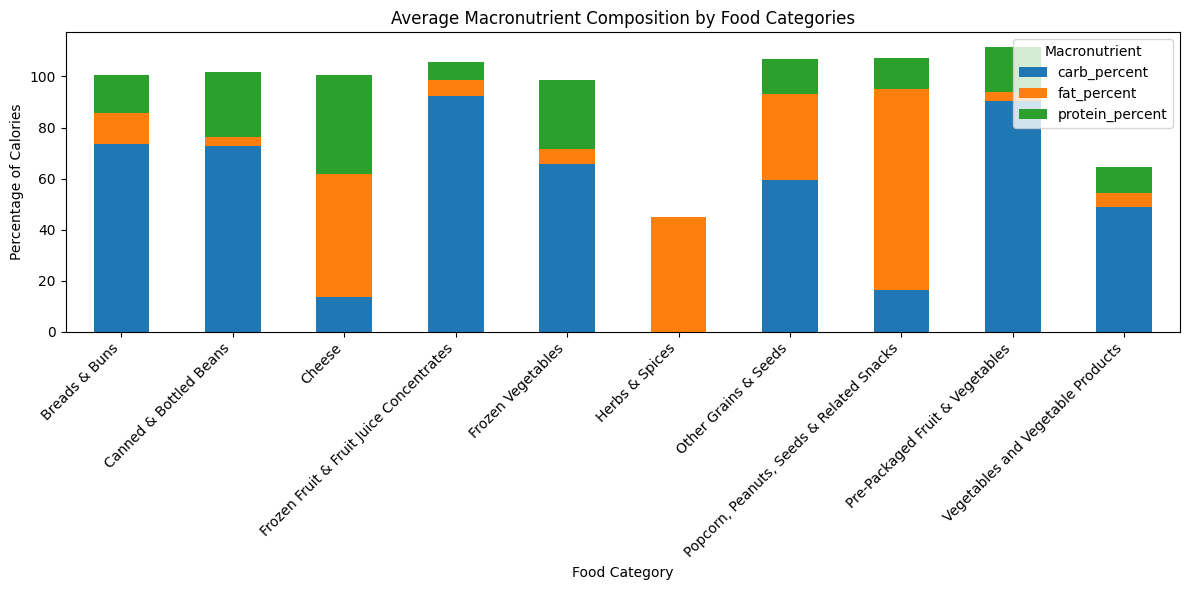

In [40]:
# Filter out rows with invalid calories directly and reassign to a new DataFrame
individual_foods_df_filtered = individual_foods_df[individual_foods_df['calories'] > 0].copy()

# Calculate macronutrient percentages safely
individual_foods_df_filtered.loc[:, 'carb_percent'] = (individual_foods_df_filtered['carbohydrates'] * 4) / individual_foods_df_filtered['calories'] * 100
individual_foods_df_filtered.loc[:, 'fat_percent'] = (individual_foods_df_filtered['fats'] * 9) / individual_foods_df_filtered['calories'] * 100
individual_foods_df_filtered.loc[:, 'protein_percent'] = (individual_foods_df_filtered['proteins'] * 4) / individual_foods_df_filtered['calories'] * 100

# Filter for top food categories
top_food_categories = individual_foods_df['food_category'].value_counts().head(10).index.tolist()
stacked_data_ind = individual_foods_df_filtered[individual_foods_df_filtered['food_category'].isin(top_food_categories)][
    ['food_category', 'carb_percent', 'fat_percent', 'protein_percent']
].groupby('food_category').mean()

# Plot stacked bar chart
stacked_data_ind.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Macronutrient Composition by Food Categories')
plt.ylabel('Percentage of Calories')
plt.xlabel('Food Category')
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.legend(title='Macronutrient', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

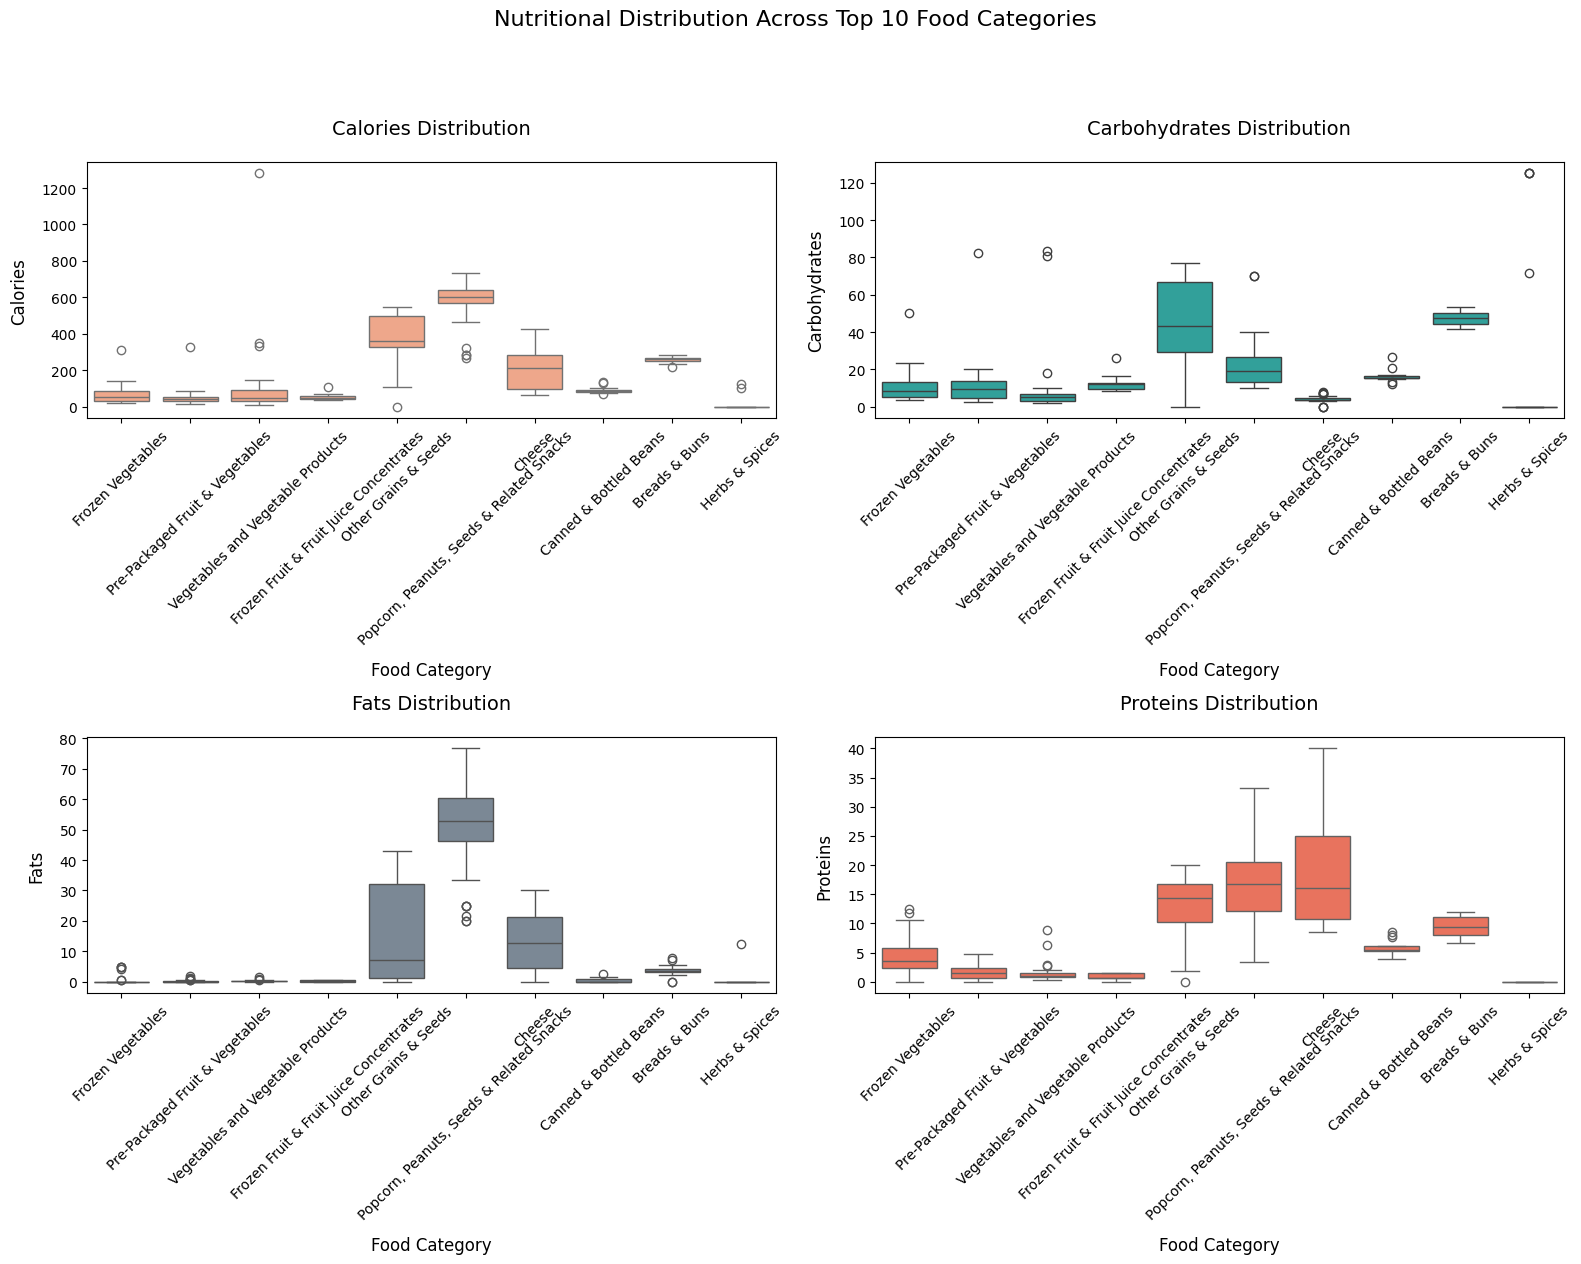

In [41]:
# Select top 10 food categories by frequency
top_categories = individual_foods_df['food_category'].value_counts().head(10).index
filtered_individual_df = individual_foods_df[individual_foods_df['food_category'].isin(top_categories)]

# 2x2 grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.7, wspace=0.4)  # Adjust spacing between subplots

# List of nutrients to plot
nutrients = ['calories', 'carbohydrates', 'fats', 'proteins']
titles = ['Calories Distribution', 'Carbohydrates Distribution', 
          'Fats Distribution', 'Proteins Distribution']
colors = ['#FFA07A', '#20B2AA', '#778899', '#FF6347']  # Distinct colors

# Loop through each nutrient and plot
for i, ax in enumerate(axes.flat):
    sns.boxplot(data=filtered_individual_df, x='food_category', y=nutrients[i], ax=ax, color=colors[i])
    ax.set_title(titles[i], fontsize=14, pad=20)
    ax.set_xlabel('Food Category', fontsize=12, labelpad=10)
    ax.set_ylabel(nutrients[i].capitalize(), fontsize=12, labelpad=10)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels directly

# Show the plots
plt.suptitle('Nutritional Distribution Across Top 10 Food Categories', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()



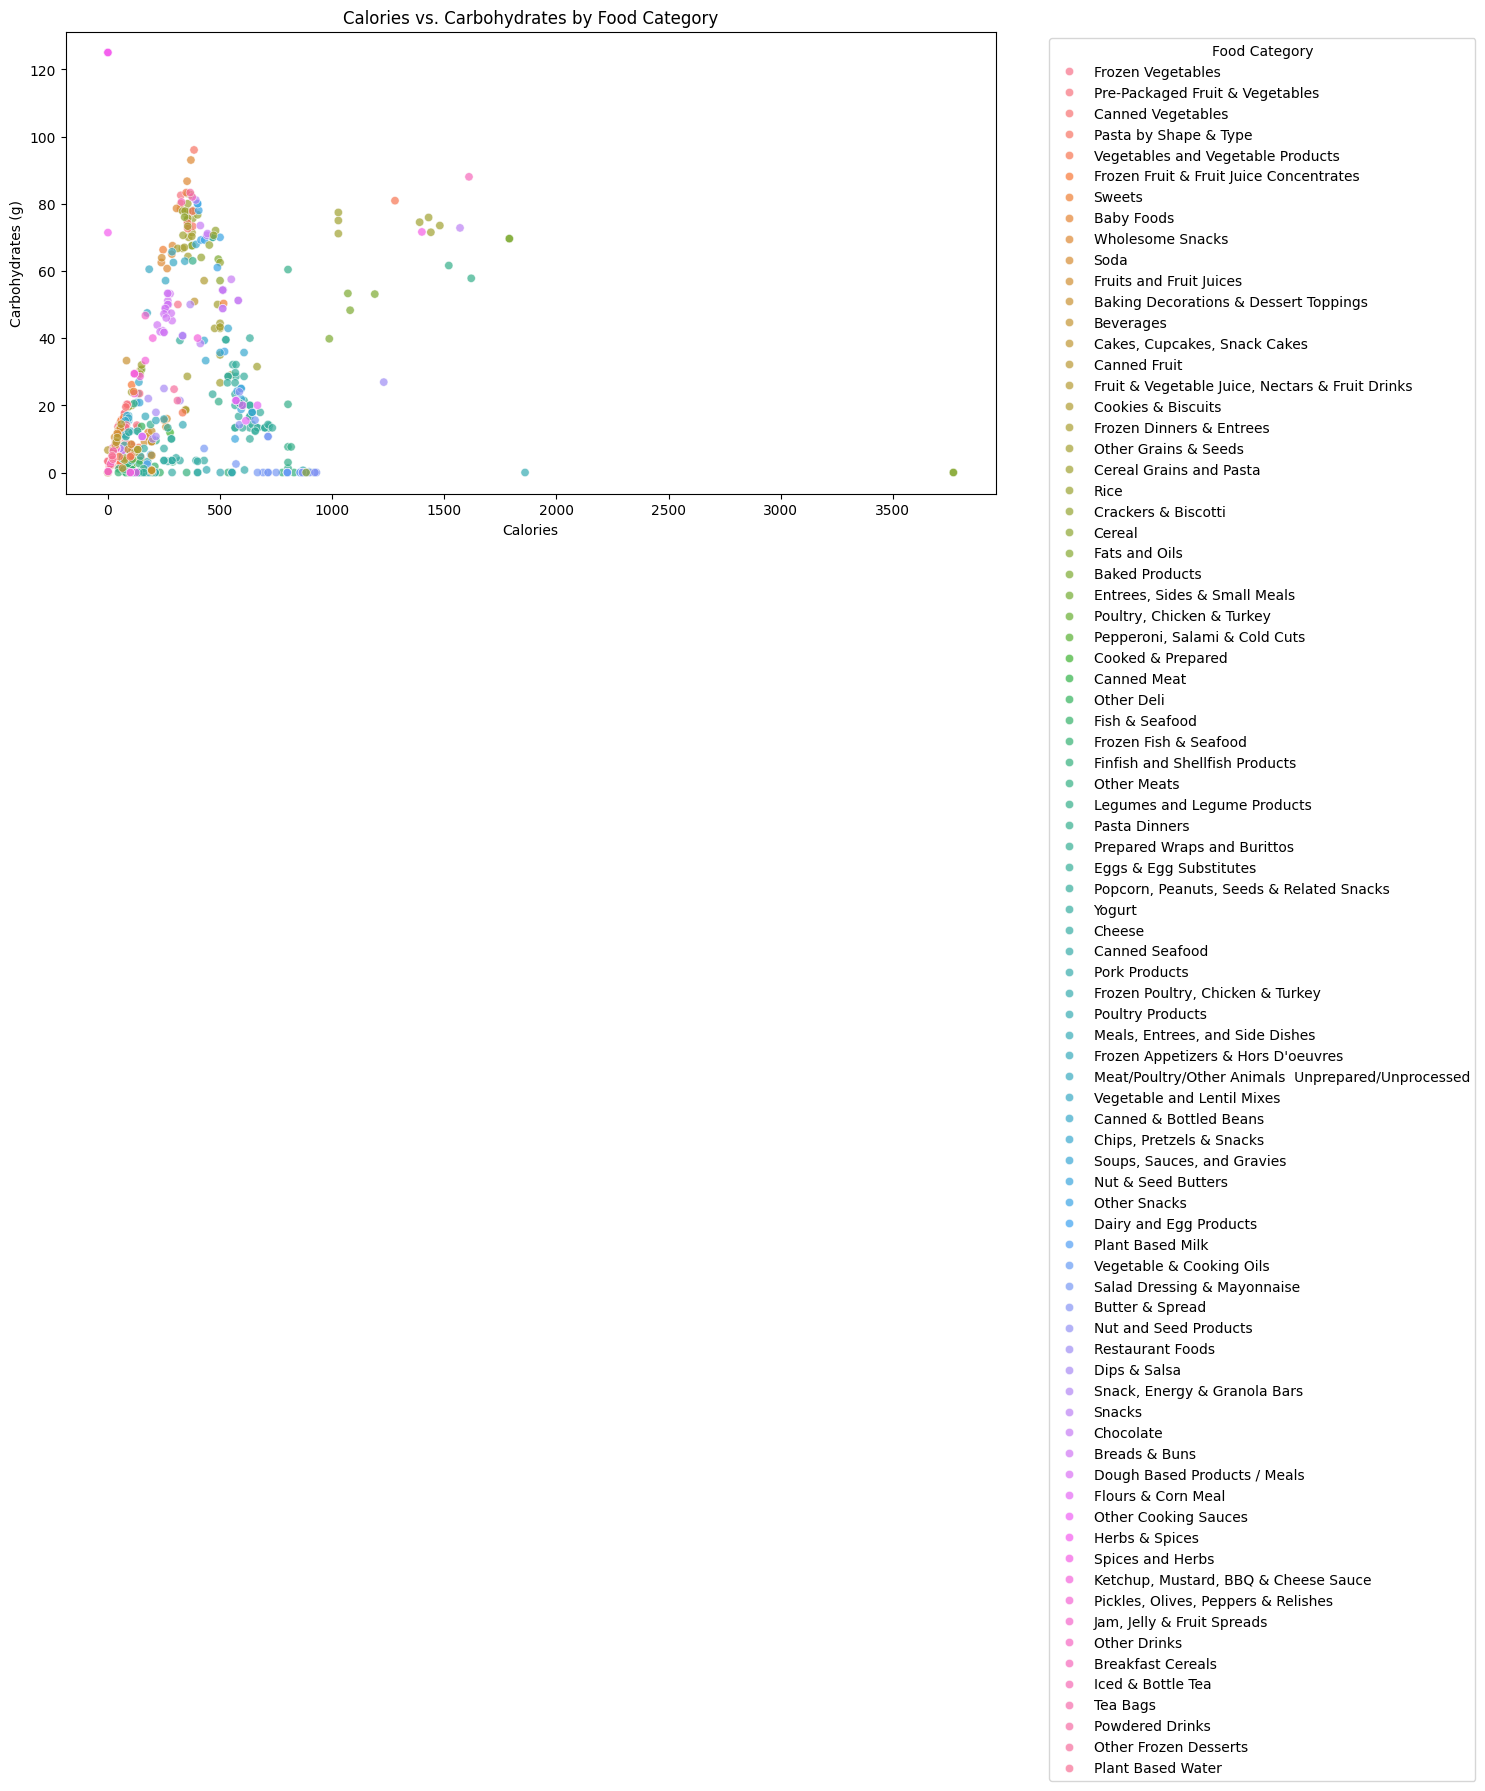

In [42]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=individual_foods_df, x='calories', y='carbohydrates', hue='food_category', alpha=0.7)
plt.title('Calories vs. Carbohydrates by Food Category')
plt.xlabel('Calories')
plt.ylabel('Carbohydrates (g)')
plt.legend(title='Food Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

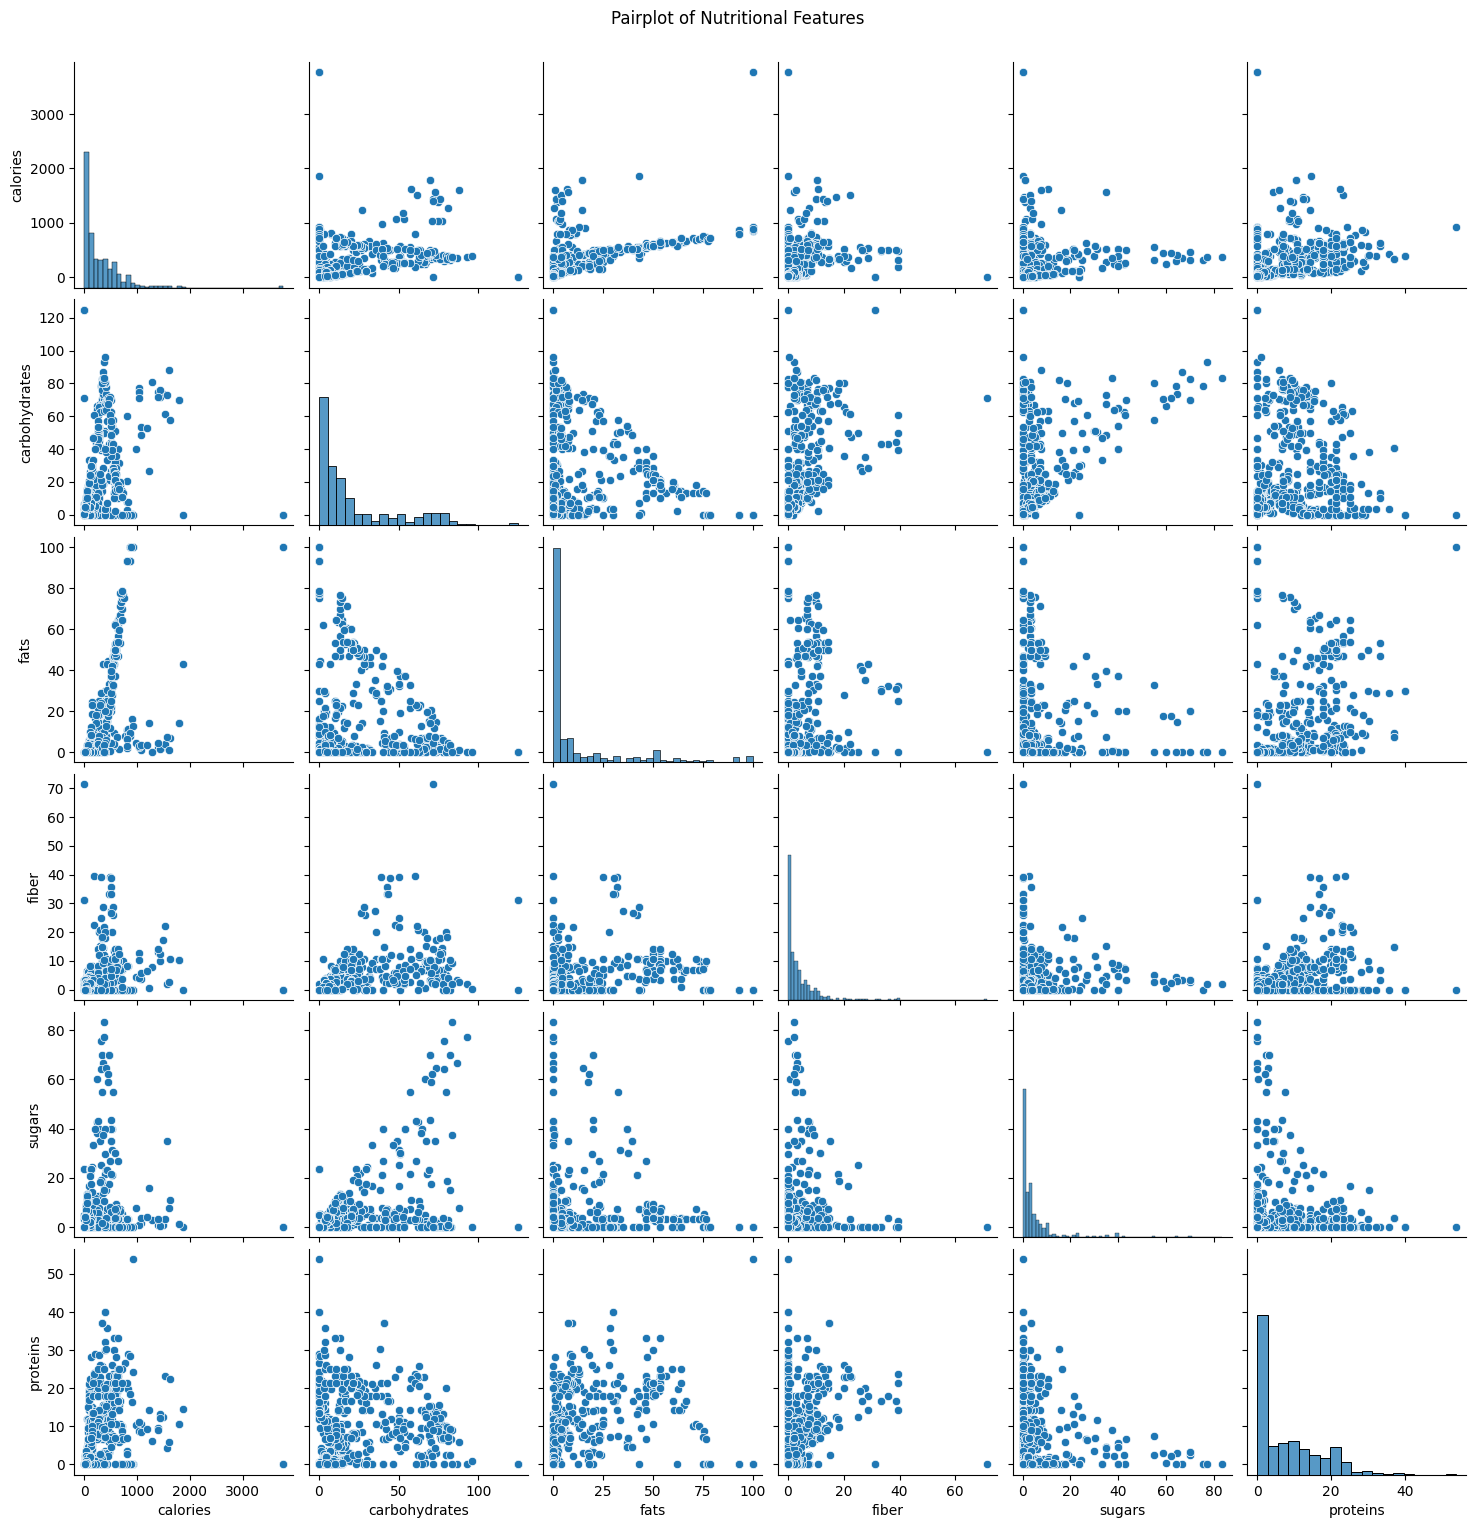

In [43]:
sns.pairplot(
    individual_foods_df[['calories', 'carbohydrates', 'fats', 'fiber', 'sugars', 'proteins']]
)
plt.suptitle("Pairplot of Nutritional Features", y=1.02)
plt.show()

#### Preprocessing

Addressing Outliers for Calories, Carbs, and Fiber

In [44]:
# Set thresholds for the super high outlier in each column
calories_threshold = individual_foods_df['calories'].quantile(0.99)  # Top 1% threshold
carbs_threshold = individual_foods_df['carbohydrates'].quantile(0.99)
fiber_threshold = individual_foods_df['fiber'].quantile(0.99)

# Filter out rows with extremely high values
individual_foods_df = individual_foods_df[
    (individual_foods_df['calories'] <= calories_threshold) &
    (individual_foods_df['carbohydrates'] <= carbs_threshold) &
    (individual_foods_df['fiber'] <= fiber_threshold)
]

# Print the resulting shape to verify the outlier removal
print("Shape after removing extreme outliers:", individual_foods_df.shape)

Shape after removing extreme outliers: (681, 11)


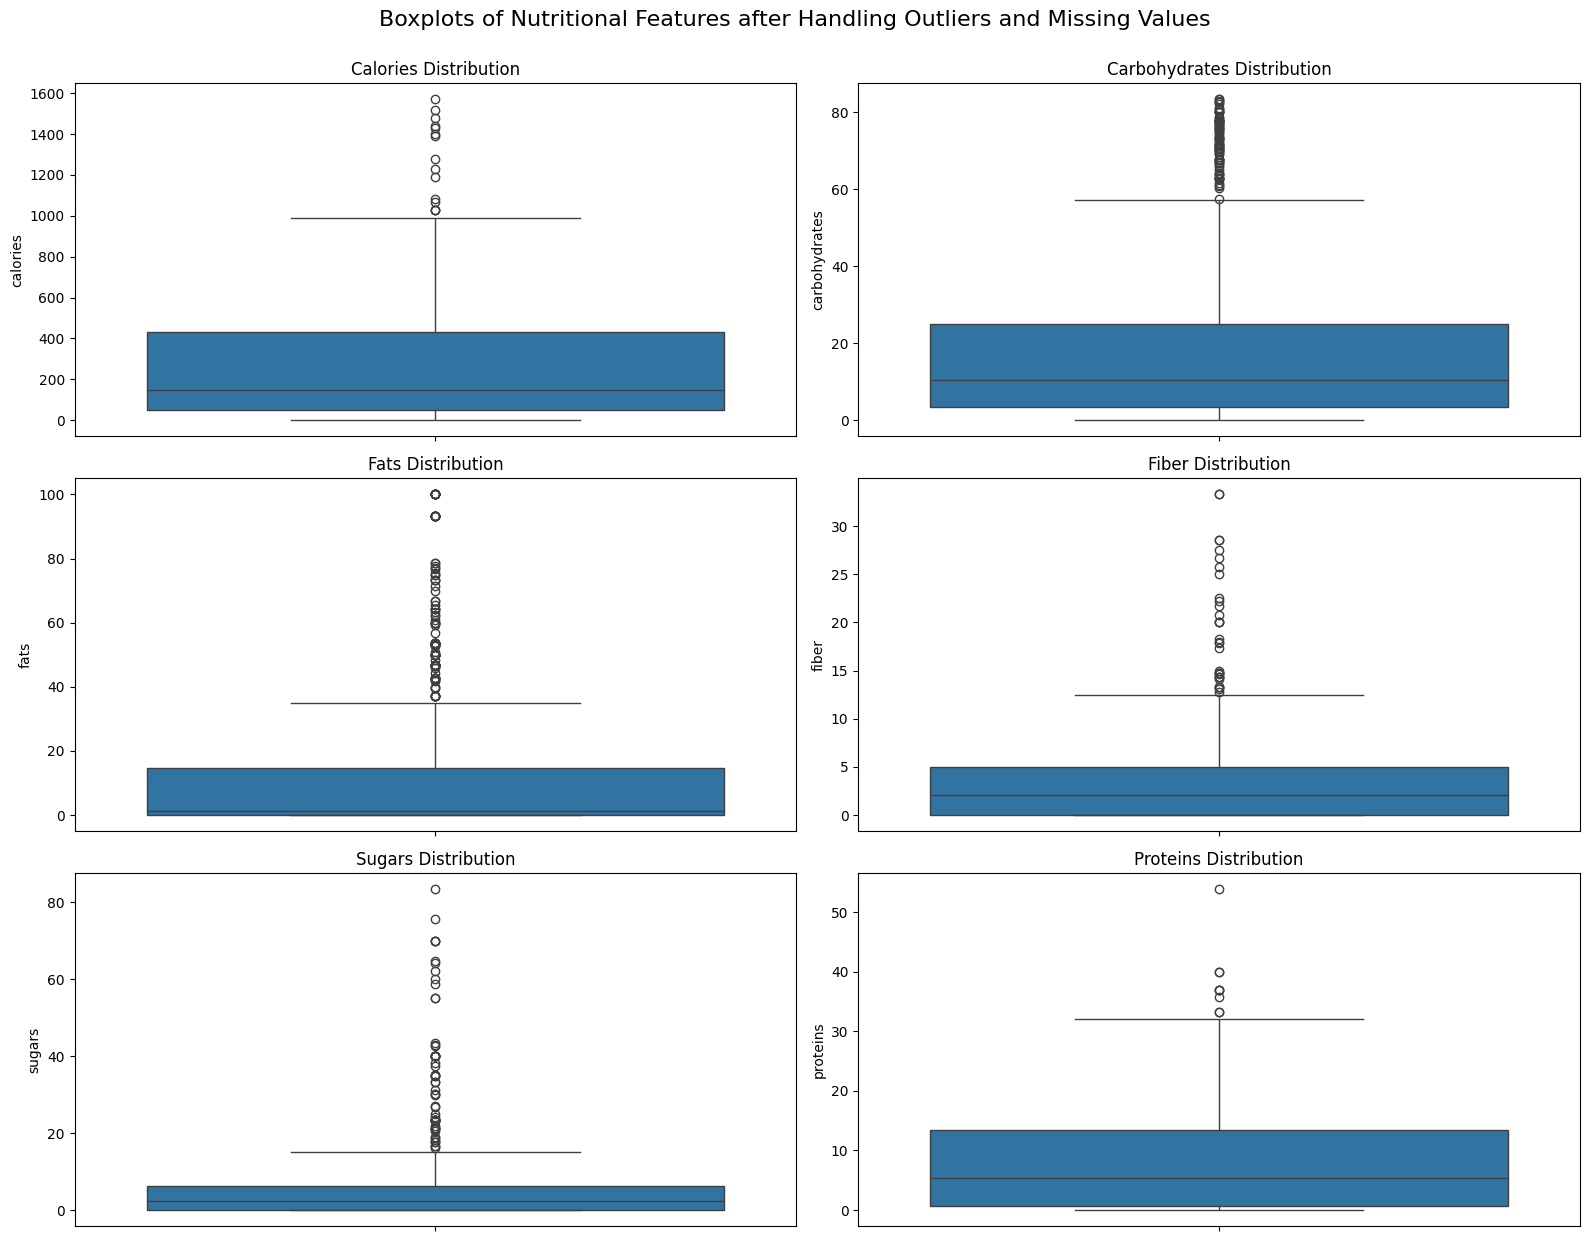

In [45]:
# Boxplots
numerical_columns = ['calories', 'carbohydrates', 'fats', 'fiber', 'sugars', 'proteins']
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=individual_foods_df, y=col, ax=axes.flat[i])
    axes.flat[i].set_title(f"{col.capitalize()} Distribution")
plt.tight_layout()
plt.suptitle("Boxplots of Nutritional Features after Handling Outliers and Missing Values", fontsize=16, y=1.03)
plt.show()

Calculate Suitability Scores

In [46]:
# Create suitability_score column for Individual Foods 
individual_foods_df.loc[:, 'score'] = individual_foods_df.apply(
    lambda row: suitability_score(row['carbohydrates'], row['sugars'], row['fiber'], row['proteins']), axis=1
)

individual_foods_df.head()

food_name          category description          brand  \
0  Broccoli  Individual Foods    BROCCOLI    GREAT VALUE   
1  Broccoli  Individual Foods    BROCCOLI      EAT SMART   
2  Broccoli  Individual Foods    BROCCOLI        Unknown   
3  Broccoli  Individual Foods    BROCCOLI          MAMBO   
4  Broccoli  Individual Foods    BROCCOLI  GOOD & GATHER   

                     food_category  calories  carbohydrates  fiber  sugars  \
0                Frozen Vegetables      24.0           4.71    3.5    1.18   
1  Pre-Packaged Fruit & Vegetables      29.0           4.71    3.5    2.35   
2  Pre-Packaged Fruit & Vegetables      34.0           5.41    2.0    1.35   
3                Frozen Vegetables      29.0           3.53    2.4    1.18   
4                Frozen Vegetables      24.0           4.71    3.5    1.18   

   fats  proteins  score  
0  0.00      2.35  0.356  
1  0.00      3.53  0.315  
2  0.34      2.70  0.338  
3  0.00      1.18  0.324  
4  0.00      2.35  0.356

In [48]:
# Remove duplicate foods by:
# Group by 'food_name' and aggregate
individual_foods_df_avg = (
    individual_foods_df
    .drop(columns=['brand'])  # Drop the 'brand' column
    .groupby('food_name', as_index=False)
    .agg({col: 'mean' if pd.api.types.is_numeric_dtype(individual_foods_df[col]) else 'first' 
          for col in individual_foods_df.columns if col != 'brand'})  # Handle non-numeric columns
)

# Display the resulting DataFrame
individual_foods_df_avg.head(20)

food_name          category  \
0      Almond Butter  Individual Foods   
1       Almond Flour  Individual Foods   
2            Almonds  Individual Foods   
3             Apples  Individual Foods   
4          Asparagus  Individual Foods   
5        Avocado oil  Individual Foods   
6             Barley  Individual Foods   
7              Basil  Individual Foods   
8       Bell peppers  Individual Foods   
9        Black beans  Individual Foods   
10      Blackberries  Individual Foods   
11       Blueberries  Individual Foods   
12          Broccoli  Individual Foods   
13        Brown rice  Individual Foods   
14  Brussels sprouts  Individual Foods   
15         Buckwheat  Individual Foods   
16            Bulgur  Individual Foods   
17           Cabbage  Individual Foods   
18       Canned Tuna  Individual Foods   
19           Cashews  Individual Foods   

                                         description  \
0                                      ALMOND BUTTER   
1                                       ALMOND FLOUR   
2                                            ALMONDS   
3                                             APPLES   
4                                          ASPARAGUS   
5                                        AVOCADO OIL   
6                                             BARLEY   
7                                              BASIL   
8                                       BELL PEPPERS   
9                                        BLACK BEANS   
10                                      BLACKBERRIES   
11                                       BLUEBERRIES   
12                                          BROCCOLI   
13                                        BROWN RICE   
14                                  BRUSSELS SPROUTS   
15                                         Buckwheat   
16                                            BULGUR   
17                                   Cabbage, kimchi   
18  Fish, tuna, light, canned in oil, drained solids   
19                                           CASHEWS   

                               food_category  calories  carbohydrates  \
0                         Nut & Seed Butters    587.80         22.500   
1                         Flours & Corn Meal    604.80         19.640   
2   Popcorn, Peanuts, Seeds & Related Snacks    594.80         18.120   
3            Pre-Packaged Fruit & Vegetables     52.80         14.180   
4            Pre-Packaged Fruit & Vegetables     21.00          3.920   
5                   Vegetable & Cooking Oils    813.40          0.000   
6                       Other Grains & Seeds    593.50         50.380   
7                             Herbs & Spices    231.25          0.000   
8            Pre-Packaged Fruit & Vegetables     43.60          5.888   
9                     Canned & Bottled Beans     96.75         17.225   
10   Frozen Fruit & Fruit Juice Concentrates     61.60         13.938   
11   Frozen Fruit & Fruit Juice Concentrates     50.60         11.394   
12                         Frozen Vegetables     28.00          4.614   
13                                      Rice    372.80         76.640   
14           Pre-Packaged Fruit & Vegetables     50.60          9.410   
15                   Cereal Grains and Pasta    784.40         61.560   
16                      Other Grains & Seeds    522.00         53.900   
17         Vegetables and Vegetable Products     26.00          4.488   
18            Finfish and Shellfish Products    486.40          0.016   
19  Popcorn, Peanuts, Seeds & Related Snacks    574.80         30.220   

      fiber   sugars     fats  proteins    score  
0   11.0000   6.9920  50.9800   21.3200  0.46120  
1    9.2200   6.3480  52.0800   21.1800  0.43040  
2   11.9000   3.1420  51.9000   20.6600  0.54620  
3    2.7600  10.4800   0.0000    0.5540  0.17460  
4    2.3600   2.0760   0.0000    2.0760  0.29600  
5    0.0000   0.0000  93.3000    0.0000  0.30000  
6    9.1200   0.6840   1.1580    6.6780  0.57960  
7    0.00

In [56]:
# Save the Preprocessed DataFrame as a CSV file in repo
data_dir = './preprocessed_data/'
individual_foods_df_avg.to_csv(data_dir + 'individual_foods_df.csv', index=False)

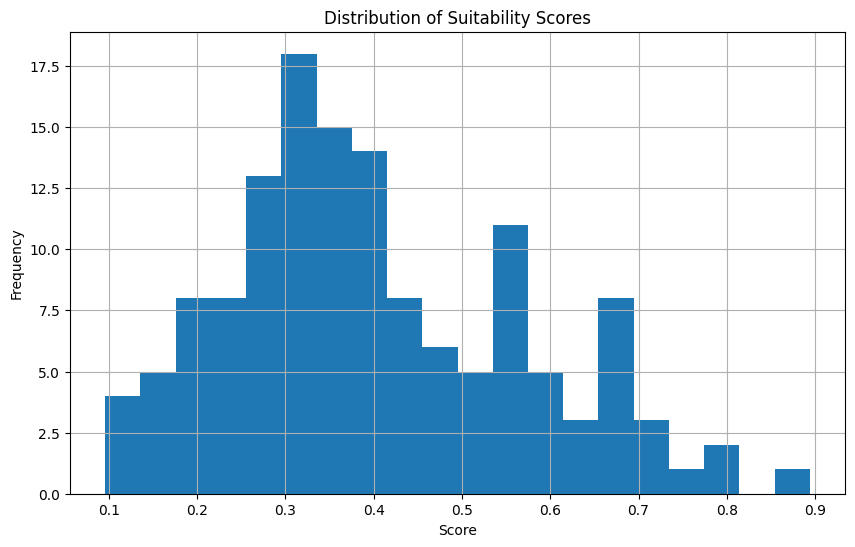

In [57]:
plt.figure(figsize=(10, 6))
individual_foods_df_avg['score'].hist(bins=20)
plt.title('Distribution of Suitability Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [58]:
# Subset food names with more than 10 records (if applicable)
individual_foods_df_categ = individual_foods_df_avg[individual_foods_df_avg['food_name'].duplicated(keep=False)]

# Sort the DataFrame by the 'score' column
sorted_foods_df = individual_foods_df_avg.sort_values(by='score', ascending=False)

# Get the top 15 food names
foodname_scores_top = sorted_foods_df.head(15)
print("Top 15 food names by score:")
print(foodname_scores_top)

# Get the bottom 15 food names
foodname_scores_bottom = sorted_foods_df.tail(15)
print("\nBottom 15 food names by score:")
print(foodname_scores_bottom)


Top 15 food names by score:
                food_name          category           description  \
24             Chia seeds  Individual Foods            CHIA SEEDS   
66                Lentils  Individual Foods               LENTILS   
102             Rye Bread  Individual Foods             RYE BREAD   
47             Flax seeds  Individual Foods            FLAX SEEDS   
45                  Farro  Individual Foods                 FARRO   
133  Whole Wheat Crackers  Individual Foods  WHOLE WHEAT CRACKERS   
59             Kale Chips  Individual Foods            KALE CHIPS   
94           Protein Bars  Individual Foods          PROTEIN BARS   
96                 Quinoa  Individual Foods                QUINOA   
38               Couscous  Individual Foods              COUSCOUS   
13             Brown rice  Individual Foods            BROWN RICE   
129           Wheat Bread  Individual Foods           WHEAT BREAD   
135             Wild Rice  Individual Foods             WILD RICE   
134   

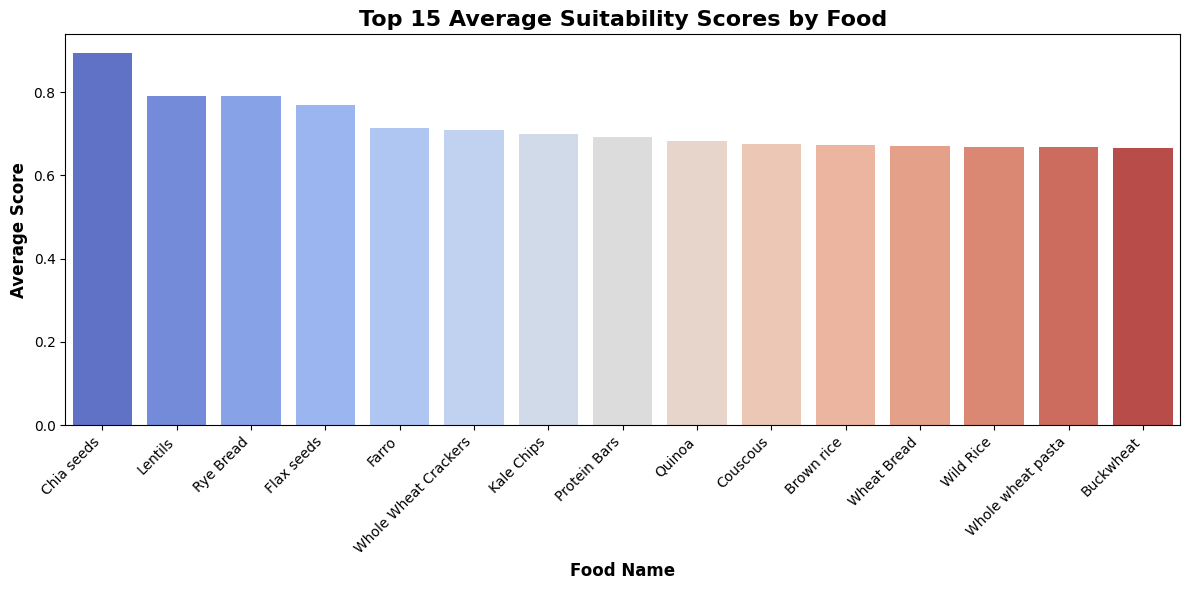

In [ ]:
# Plot the top 15 foods
plt.figure(figsize=(12, 6))
sns.barplot(
    data=foodname_scores_top,
    x='food_name',
    y='score',
    palette='coolwarm',
    hue='food_name',  # Assign hue to match the x-axis variable
    dodge=False  # Disable dodging since it's redundant here
)

# Add title and axis labels
plt.title('Top 15 Average Suitability Scores by Food', fontsize=16, weight='bold')
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.xlabel('Food Name', fontsize=12, weight='bold')
plt.ylabel('Average Score', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()


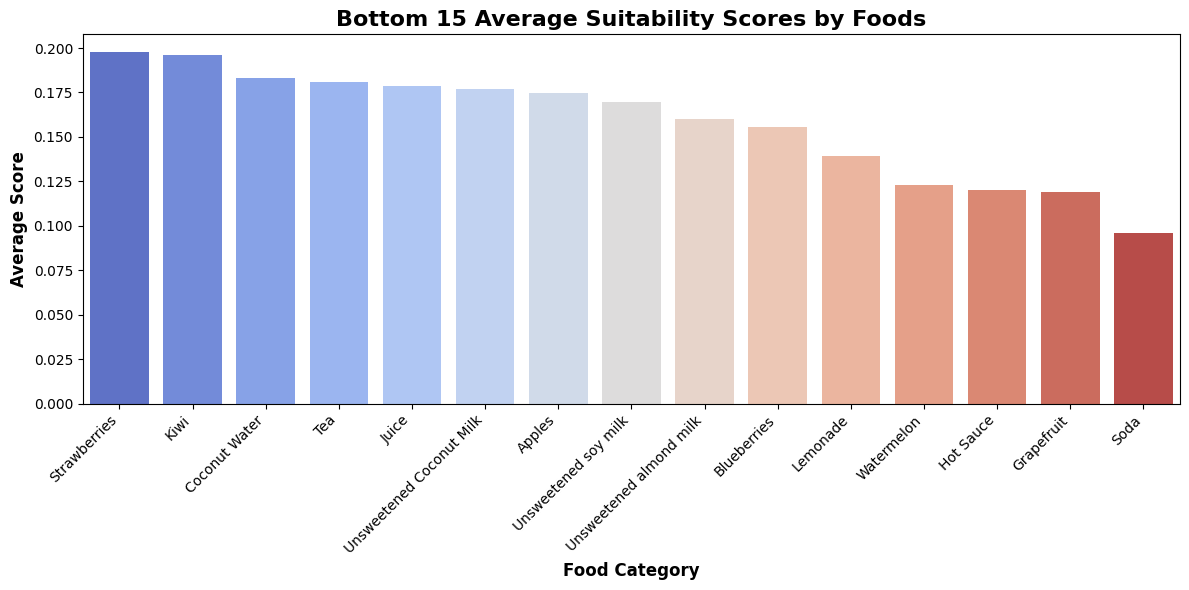

In [64]:
# Plot the top 15 foods
plt.figure(figsize=(12, 6))
sns.barplot(
    data=foodname_scores_bottom,
    x='food_name',
    y='score',
    palette='coolwarm',
    hue='food_name',  # Assign hue to match the x-axis variable
    dodge=False  # Disable dodging since it's redundant here
)

# Add title and axis labels
plt.title('Bottom 15 Average Suitability Scores by Foods', fontsize=16, weight='bold')
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.xlabel('Food Category', fontsize=12, weight='bold')
plt.ylabel('Average Score', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

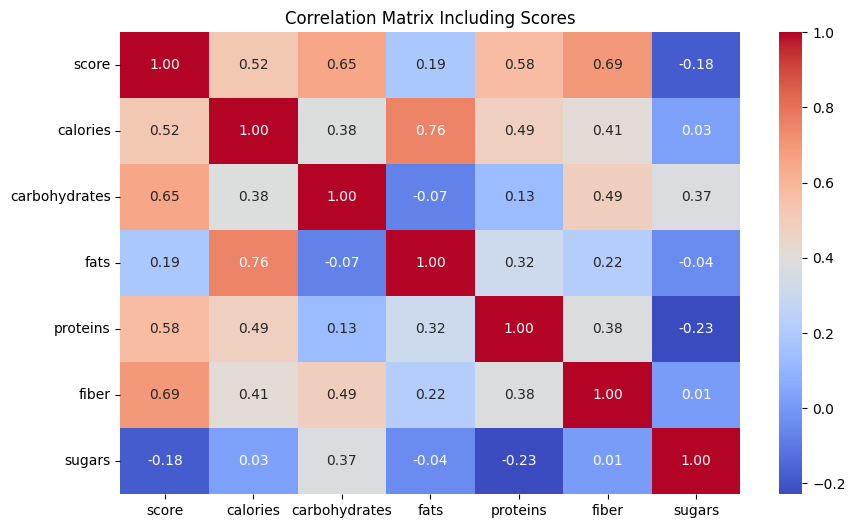

In [66]:
corr_matrix = individual_foods_df_avg[['score', 'calories', 'carbohydrates', 'fats', 'proteins', 'fiber', 'sugars']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Including Scores')
plt.show()

### Patient Data (patient_df)

#### Exploratory Data Analysis

In [132]:
# Load master patient CSV file
patient_df = pd.read_csv('./data/patient_records.csv')

print("Patient Data:",  patient_df.shape)
patient_df.head()

Patient Data: (17118, 24)


Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           2.0       1       0.0          1  28.0     0.0     0.0   
1           2.0       1       1.0          1  33.0     0.0     0.0   
2           2.0       0       1.0          1  29.0     0.0     1.0   
3           2.0       0       0.0          1  24.0     0.0     0.0   
4           2.0       0       0.0          1  33.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  GenHlth  MentHlth  \
0                   1.0             0       1  ...      2.0       0.0   
1                   0.0             1       1  ...      2.0      10.0   
2                   1.0             1       1  ...      5.0       0.0   
3                   1.0             0       0  ...      4.0       0.0   
4                   0.0             1       0  ...      4.0       0.0   

   PhysHlth  DiffWalk  Sex  Age  Education  Income  Glucose Value  \
0       0.0       0.0    0   11        4.0     3.0            117   
1       0.0       0.0    0    9        4.0     7.0            115   
2      30.0       1.0    1   12        3.0     4.0            114   
3       0.0       0.0    1   12        6.0     7.0            115   
4       0.0       0.0    1    6        5.0     2.0            115   

          Time Checked  
0  2024-11-05T14:18:32  
1  2024-11-05T14:13:32  
2  2024-11-05T14:08:32  
3  2024-11-05T14:03:33  
4  2024-11-05T13:58:32  

[5 rows x 24 columns]

In [134]:
# Create ID column
patient_df['ID'] = patient_df.index

# Move ID to first column
patient_df.insert(0, 'ID', patient_df.pop('ID'))

In [136]:
# Glucose Ranking
def glucose_rank(row):
    if row <= 79:
        return 'Low'
    elif 80 <= row < 130:
        return 'Norm'
    else:
        return 'High'

# Apply the function to create a new column 'GlucoseStatus'
patient_df['GlucoseRank'] = patient_df['Glucose Value'].apply(glucose_rank)
patient_df

ID  Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0          0           2.0       1       0.0          1  28.0     0.0     0.0   
1          1           2.0       1       1.0          1  33.0     0.0     0.0   
2          2           2.0       0       1.0          1  29.0     0.0     1.0   
3          3           2.0       0       0.0          1  24.0     0.0     0.0   
4          4           2.0       0       0.0          1  33.0     1.0     0.0   
...      ...           ...     ...       ...        ...   ...     ...     ...   
17113  17113           2.0       1       1.0          1  29.0     1.0     1.0   
17114  17114           2.0       0       1.0          1  28.0     1.0     0.0   
17115  17115           2.0       0       0.0          1  29.0     1.0     0.0   
17116  17116           2.0       1       0.0          1  39.0     0.0     0.0   
17117  17117           2.0       1       0.0          1  39.0     1.0     0.0   

       HeartDiseaseorAttack  PhysActivity  ...  MentHlth  PhysHlth  DiffWalk  \
0                       1.0             0  ...       0.0       0.0       0.0   
1                       0.0             1  ...      10.0       0.0       0.0   
2                       1.0             1  ...       0.0      30.0       1.0   
3                       1.0             0  ...       0.0       0.0       0.0   
4                       0.0             1  ...       0.0       0.0       0.0   
...                     ...           ...  ...       ...       ...       ...   
17113                   0.0             1  ...       0.0      10.0       1.0   
17114                   1.0             1  ...       0.0      10.0       0.0   
17115                   1.0             1  ...       0.0       0.0       0.0   
17116                   0.0             0  ...       1.0       0.0       1.0   
17117                   0.0             1  ...       5.0       3.0       0.0   

       Sex  Age  Education  Income  Glucose Value         Time Checked  \
0        0   11        4.0     3.0            117  2024-11-05T14:18:32   
1        0    9        4.0     7.0            115  2024-11-05T14:13:32   
2        1   12        3.0     4.0            114  2024-11-05T14:08:32   
3        1   12        6.0     7.0            115  2024-11-05T14:03:33   
4        1    6        5.0     2.0            115  2024-11-05T13:58:32   
...    ...  ...        ...     ...            ...                  ...   
17113    0    9        5.0     5.0            139  2024-09-06T15:43:32   
17114    1    9        4.0     5.0            140  2024-09-06T15:38:32   
17115    1   13        4.0     3.0            137  2024-09-06T15:33:33   
17116    0    8        5.0     6.0            131  2024-09-06T15:28:33   
17117    0    8        4.0     4.0            126  2024-09-06T15:23:33   

       GlucoseRank  
0             Norm  
1             Norm  
2             Norm  
3             Norm  
4             Norm  
...            ...  
17113         High  
17114         High  
17115         High  
17116         High  
17117         Norm  

[17118 rows x 26 columns]

In [138]:
# Basic overview
print(patient_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17118 entries, 0 to 17117
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    17118 non-null  int64  
 1   Diabetes_012          17118 non-null  float64
 2   HighBP                17118 non-null  int64  
 3   HighChol              17118 non-null  float64
 4   CholCheck             17118 non-null  int64  
 5   BMI                   17118 non-null  float64
 6   Smoker                17118 non-null  float64
 7   Stroke                17118 non-null  float64
 8   HeartDiseaseorAttack  17118 non-null  float64
 9   PhysActivity          17118 non-null  int64  
 10  Fruits                17118 non-null  int64  
 11  Veggies               17118 non-null  int64  
 12  HvyAlcoholConsump     17118 non-null  int64  
 13  AnyHealthcare         17118 non-null  int64  
 14  NoDocbcCost           17118 non-null  float64
 15  GenHlth            

In [140]:
# Check for missing values
print(patient_df.isnull().sum())

ID                      0
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Glucose Value           0
Time Checked            0
GlucoseRank             0
dtype: int64


In [142]:
# Numeric columns for summary statistics
numeric_cols = ['BMI', 'Age', 'Education', 'Income', 'Glucose Value']
numeric_stats = patient_df[numeric_cols].describe().transpose()
numeric_stats.round(2)

count    mean    std   min    25%    50%    75%    max
BMI            17118.0   32.25   7.40  13.0   27.0   31.0   36.0   87.0
Age            17118.0    9.39   2.45   1.0    8.0   10.0   11.0   13.0
Education      17118.0    4.92   0.99   1.0    4.0    5.0    6.0    6.0
Income         17118.0    6.10   2.38   1.0    5.0    6.0    8.0   11.0
Glucose Value  17118.0  132.53  44.29  46.0  103.0  122.0  153.0  318.0

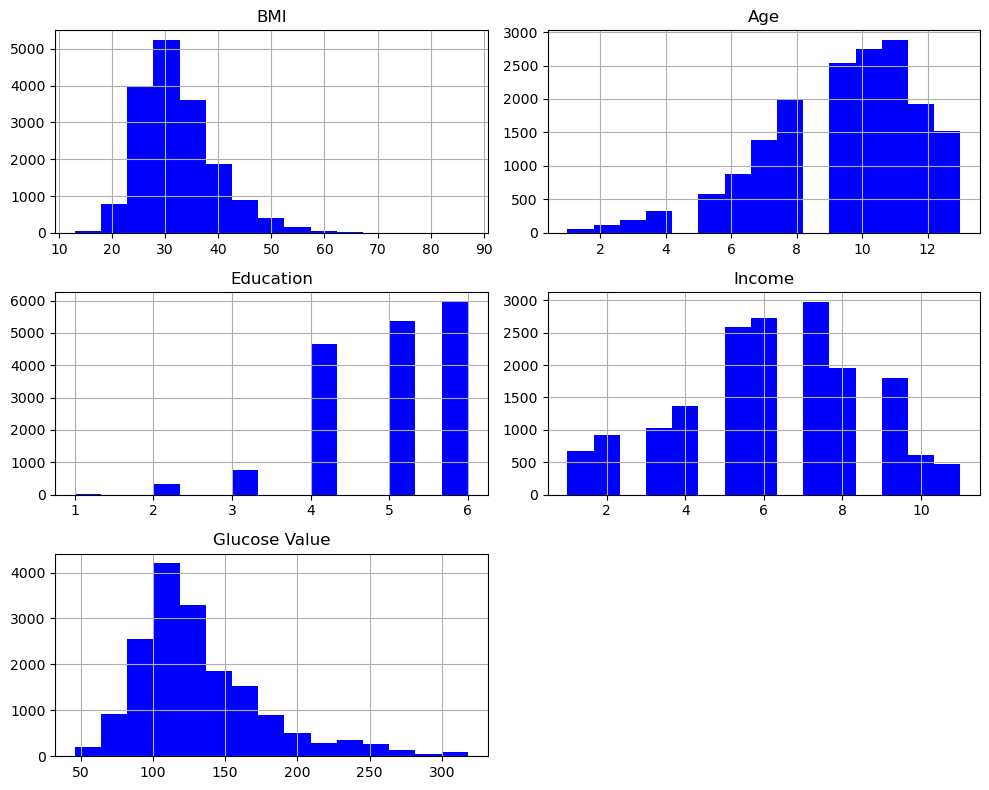

In [144]:
# Histograms for numeric columns
patient_df[numeric_cols].hist(bins=15, figsize=(10, 8), color='blue')
plt.tight_layout()

# Ensure the "PatientVisualizations" folder exists
os.makedirs("PatientVisualizations", exist_ok=True)  # Create the folder if it doesn't exist

# Save the figure to a JPEG file
plt.savefig("PatientVisualizations/num_ord_hist.jpg", format="jpeg", dpi=300)

plt.show()

In [145]:
# Correlation matrix
corr_matrix = patient_df[numeric_cols].corr()
print(corr_matrix)

                    BMI       Age  Education    Income  Glucose Value
BMI            1.000000 -0.227833  -0.034396 -0.082886       0.007772
Age           -0.227833  1.000000   0.006971 -0.054528       0.019410
Education     -0.034396  0.006971   1.000000  0.412138       0.008718
Income        -0.082886 -0.054528   0.412138  1.000000      -0.000593
Glucose Value  0.007772  0.019410   0.008718 -0.000593       1.000000


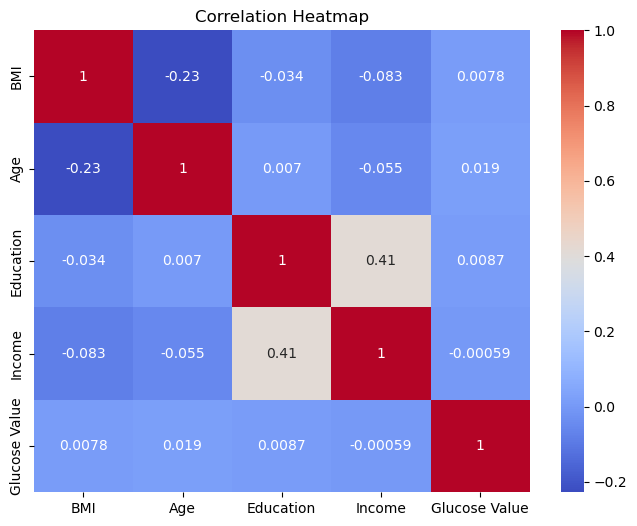

In [148]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

# Save the figure to a JPEG file
plt.savefig("PatientVisualizations/correlation.jpg", format="jpeg", dpi=300)

plt.show()

The strongest relationship among the numeric and ordinal variables is Education and Income with a coefficient of 0.41. This is a positive finding from EDA as there is not a high risk of multicollinearity within the patient data.

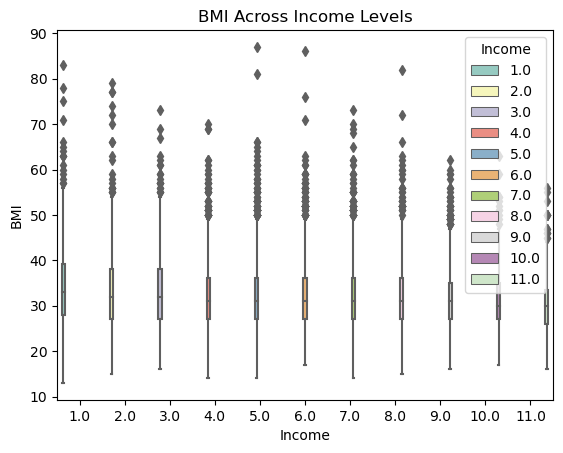

In [151]:
# Boxplot of BMI by Income
sns.boxplot(x='Income', y='BMI', data=patient_df, hue='Income', palette='Set3')
plt.title("BMI Across Income Levels")
plt.show()

In [153]:
# Categorical/binary columns
binary_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
               'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
               'NoDocbcCost', 'DiffWalk', 'Sex']

# Iterate through binary columns and print formatted value counts
for col in binary_cols:
    print(f"\n{'='*40}\nValue counts for {col}:\n{'='*40}")
    print(patient_df[col].value_counts())


Value counts for HighBP:
1    12638
0     4480
Name: HighBP, dtype: int64

Value counts for HighChol:
1.0    10994
0.0     6124
Name: HighChol, dtype: int64

Value counts for CholCheck:
1    17030
0       88
Name: CholCheck, dtype: int64

Value counts for Smoker:
0.0    8887
1.0    8231
Name: Smoker, dtype: int64

Value counts for Stroke:
0.0    15634
1.0     1484
Name: Stroke, dtype: int64

Value counts for HeartDiseaseorAttack:
0.0    13616
1.0     3502
Name: HeartDiseaseorAttack, dtype: int64

Value counts for PhysActivity:
1    10812
0     6306
Name: PhysActivity, dtype: int64

Value counts for Fruits:
1    9964
0    7154
Name: Fruits, dtype: int64

Value counts for Veggies:
1    13429
0     3689
Name: Veggies, dtype: int64

Value counts for HvyAlcoholConsump:
0    16631
1      487
Name: HvyAlcoholConsump, dtype: int64

Value counts for AnyHealthcare:
1    16704
0      414
Name: AnyHealthcare, dtype: int64

Value counts for NoDocbcCost:
0.0    15888
1.0     1230
Name: NoDocbcCost,

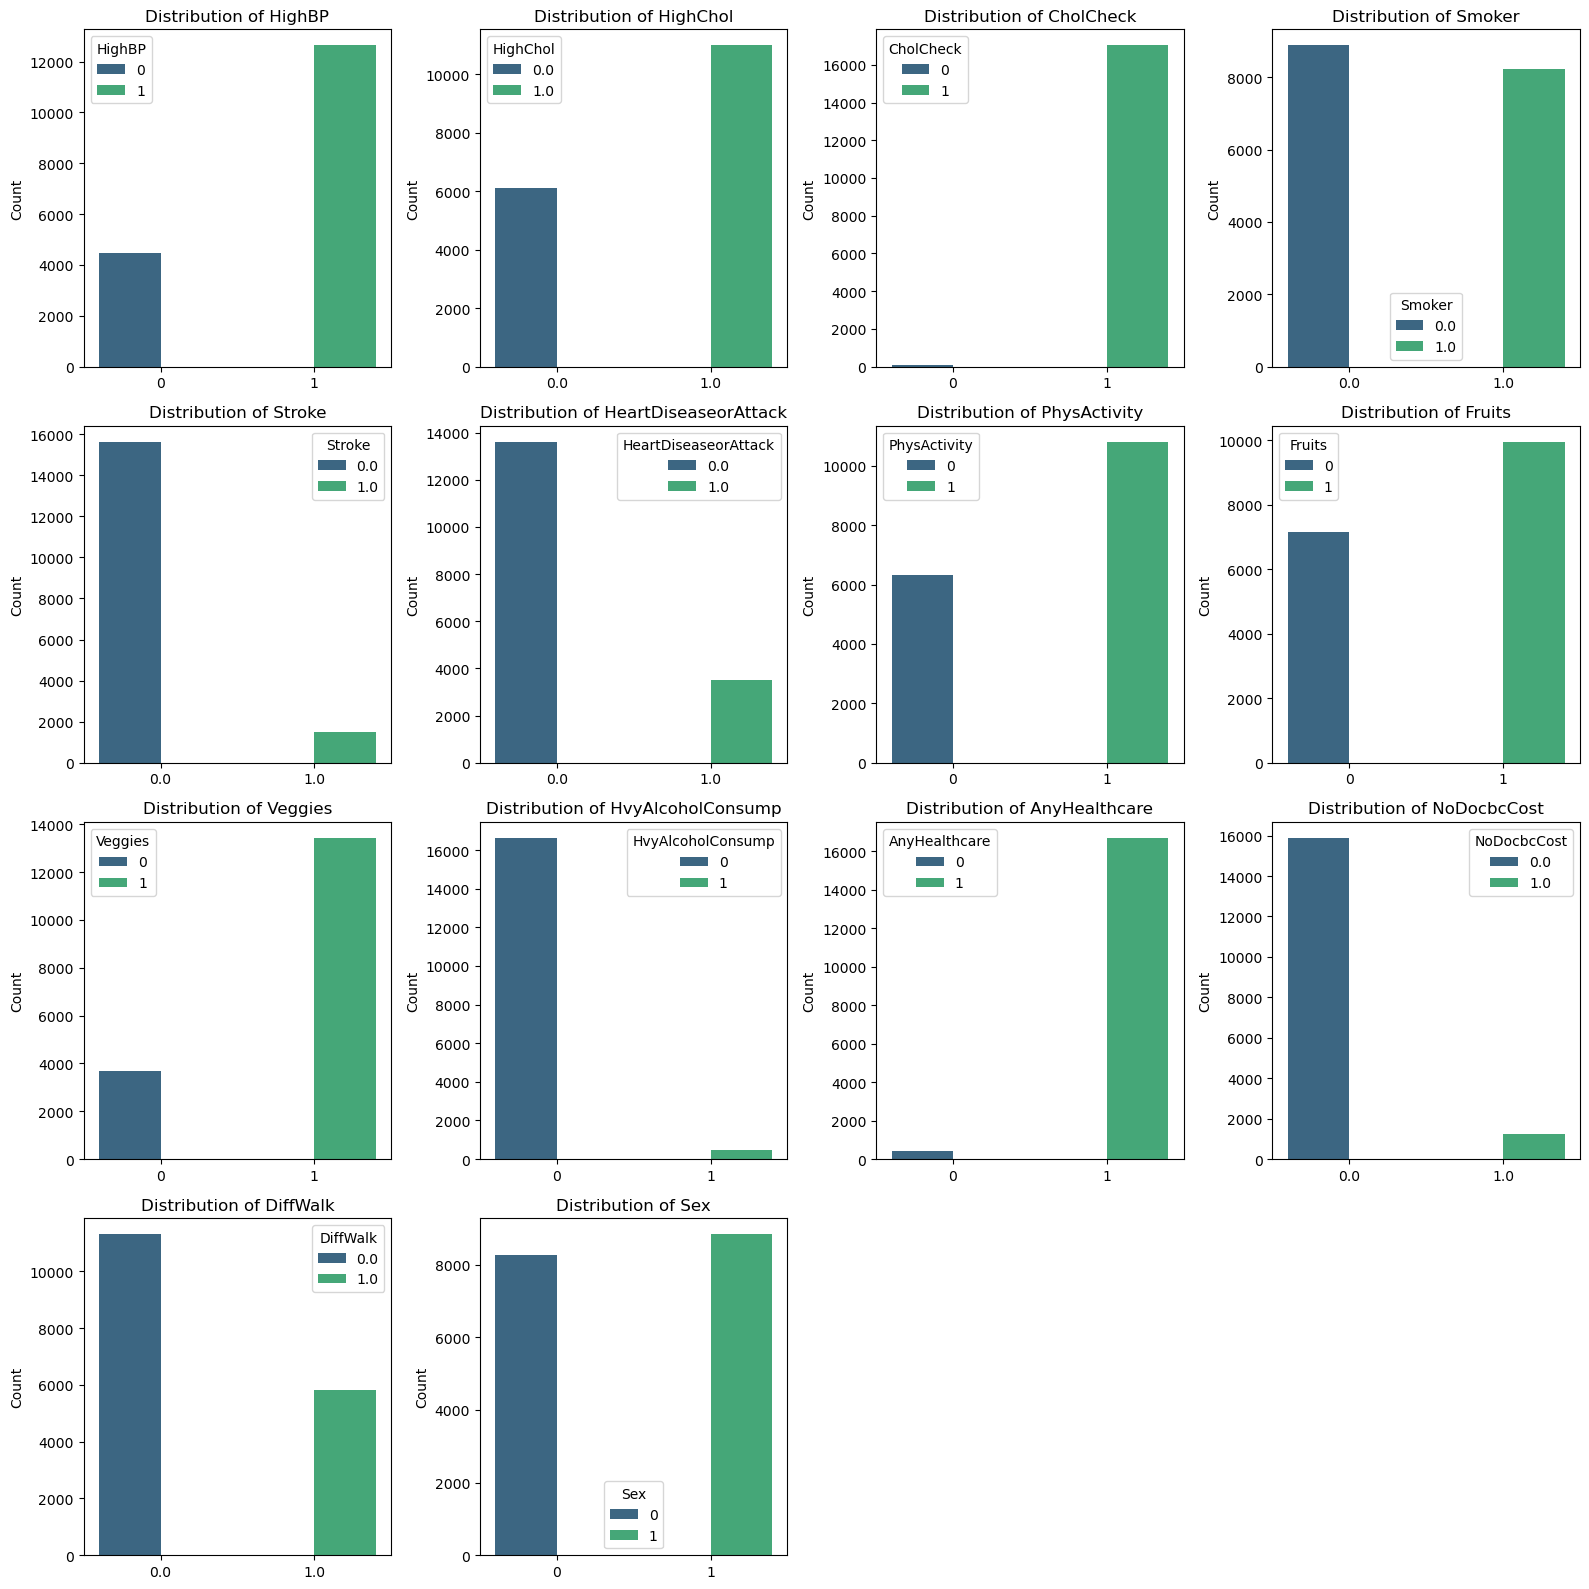

In [155]:
# Number of columns and rows
n_cols = 4
n_rows = (len(binary_cols) + n_cols - 1) // n_cols  # Ceiling division for rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate

# Plot each binary column
for i, col in enumerate(binary_cols):
    sns.countplot(x=col, data=patient_df, ax=axes[i], hue=col, palette='viridis')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')  # Hide unused subplots

# Adjust layout and display
plt.tight_layout()

# Save the figure to a JPEG file
plt.savefig("PatientVisualizations/binary_dist.jpg", format="jpeg", dpi=300)

plt.show()


Binary features do experience an imbalance in favor of a majority class; this will need to be corrected during the preprocessing stages. However, it is important to note that the 'Sex' feature is equal, suggesting equal demographic representation.

In [157]:
# Point-Biserial correlation for binary features vs. continuous target variable (glucose value)
for col in binary_cols:
    corr, p_value = pointbiserialr(patient_df[col], patient_df['Glucose Value'])
    print(f'Correlation between {col} and Glucose Value: {corr:.4f}, p-value = {p_value:.4f}')

Correlation between HighBP and Glucose Value: 0.0003, p-value = 0.9636
Correlation between HighChol and Glucose Value: 0.0003, p-value = 0.9695
Correlation between CholCheck and Glucose Value: -0.0068, p-value = 0.3717
Correlation between Smoker and Glucose Value: -0.0085, p-value = 0.2672
Correlation between Stroke and Glucose Value: 0.0121, p-value = 0.1120
Correlation between HeartDiseaseorAttack and Glucose Value: 0.0106, p-value = 0.1637
Correlation between PhysActivity and Glucose Value: -0.0075, p-value = 0.3296
Correlation between Fruits and Glucose Value: -0.0082, p-value = 0.2840
Correlation between Veggies and Glucose Value: -0.0047, p-value = 0.5353
Correlation between HvyAlcoholConsump and Glucose Value: 0.0046, p-value = 0.5436
Correlation between AnyHealthcare and Glucose Value: 0.0084, p-value = 0.2744
Correlation between NoDocbcCost and Glucose Value: -0.0114, p-value = 0.1346
Correlation between DiffWalk and Glucose Value: -0.0038, p-value = 0.6180
Correlation between

The Point Biserial Correlation does not show any strong relationships between the binary variables and GLucose Value. This is not concerning as Glucose Value is not the target variable of this data science objective; the team only wanted to see how the features interact.

#### Preprocessing

In [162]:
# Scale ordinal variables ('Age', 'Education', 'Income')
scaler = MinMaxScaler()
patient_df[['Age', 'Education', 'Income']] = scaler.fit_transform(patient_df[['Age', 'Education', 'Income']])

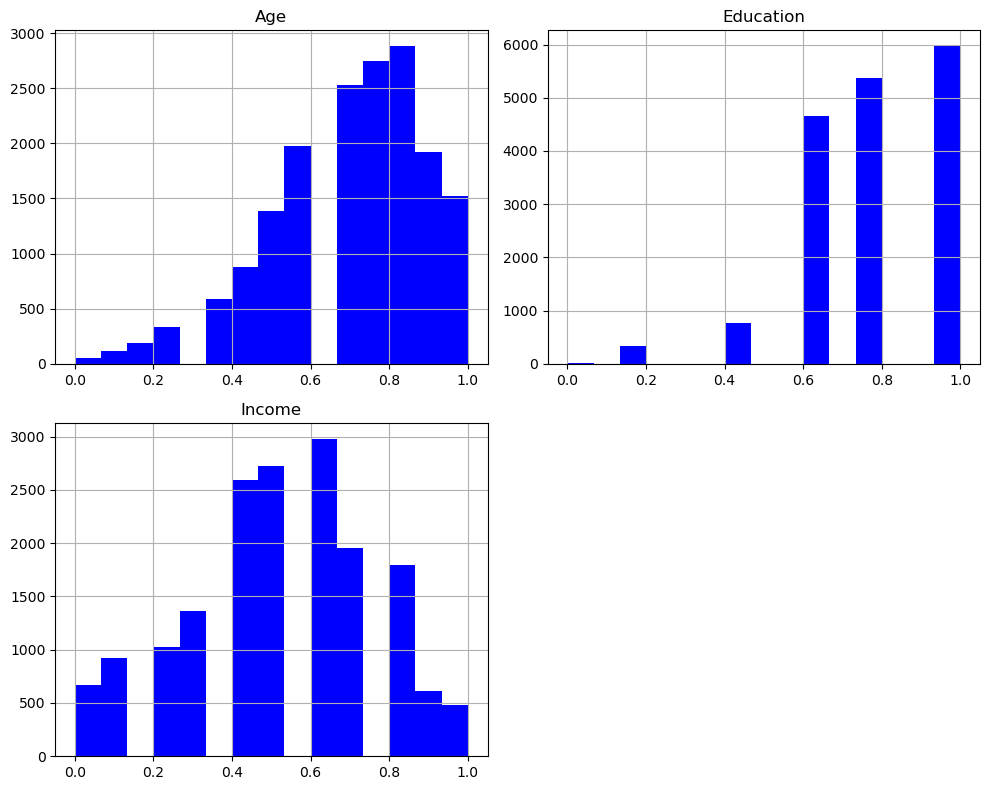

In [164]:
# Ordinal Columns
ord_cols = ['Age', 'Education', 'Income']

# Histograms to validate scaling of ordinal columns
patient_df[ord_cols].hist(bins=15, figsize=(10, 8), color='blue')
plt.tight_layout()

# Save the figure to a JPEG file
plt.savefig("PatientVisualizations/scaled_hist.jpg", format="jpeg", dpi=300)

plt.show()

In [166]:
# Oversampling binary variable imbalances
def oversample_binary_feature(df, feature, max_rows=None):
    """
    Oversample the binary feature in the dataset by duplicating the minority class.
    
    Parameters:
        df (pd.DataFrame): The dataset containing the feature to balance.
        feature (str): The name of the binary feature to balance.
    
    Returns:
        pd.DataFrame: The updated dataframe with a balanced binary feature.
    """
    # Separate the two classes
    class_0 = df[df[feature] == 0]
    class_1 = df[df[feature] == 1]
    
    # Determine the size of the larger class
    max_size = max(len(class_0), len(class_1))

    # Apply max_rows limit if provided
    if max_rows is not None:
        max_size = min(max_size, max_rows)
    
    # Oversample the minority class
    if len(class_0) < len(class_1):
        class_0_resampled = class_0.sample(max_size, replace=True, random_state=42)  # Duplicate rows
        class_1_resampled = class_1
    else:
        class_0_resampled = class_0
        class_1_resampled = class_1.sample(max_size, replace=True, random_state=42)  # Duplicate rows
    
    # Combine the resampled classes
    balanced_df = pd.concat([class_0_resampled, class_1_resampled]).sample(frac=1, random_state=42)  # Shuffle rows
    
    return balanced_df

# Resample binary imbalances
binary_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
               'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
               'NoDocbcCost', 'DiffWalk', 'Sex']

for col in binary_cols:
    patient_df = oversample_binary_feature(patient_df, col, max_rows=7000)

# Check value counts for all binary features
for col in binary_cols:
    print(f"{col} distribution:\n{patient_df[col].value_counts()}\n")

HighBP distribution:
1    13785
0     9821
Name: HighBP, dtype: int64

HighChol distribution:
1.0    14004
0.0     9602
Name: HighChol, dtype: int64

CholCheck distribution:
1    14285
0     9321
Name: CholCheck, dtype: int64

Smoker distribution:
1.0    16558
0.0     7048
Name: Smoker, dtype: int64

Stroke distribution:
0.0    17643
1.0     5963
Name: Stroke, dtype: int64

HeartDiseaseorAttack distribution:
0.0    17035
1.0     6571
Name: HeartDiseaseorAttack, dtype: int64

PhysActivity distribution:
1    17590
0     6016
Name: PhysActivity, dtype: int64

Fruits distribution:
1    14174
0     9432
Name: Fruits, dtype: int64

Veggies distribution:
1    16881
0     6725
Name: Veggies, dtype: int64

HvyAlcoholConsump distribution:
0    17385
1     6221
Name: HvyAlcoholConsump, dtype: int64

AnyHealthcare distribution:
1    18533
0     5073
Name: AnyHealthcare, dtype: int64

NoDocbcCost distribution:
0.0    18864
1.0     4742
Name: NoDocbcCost, dtype: int64

DiffWalk distribution:
0.0    

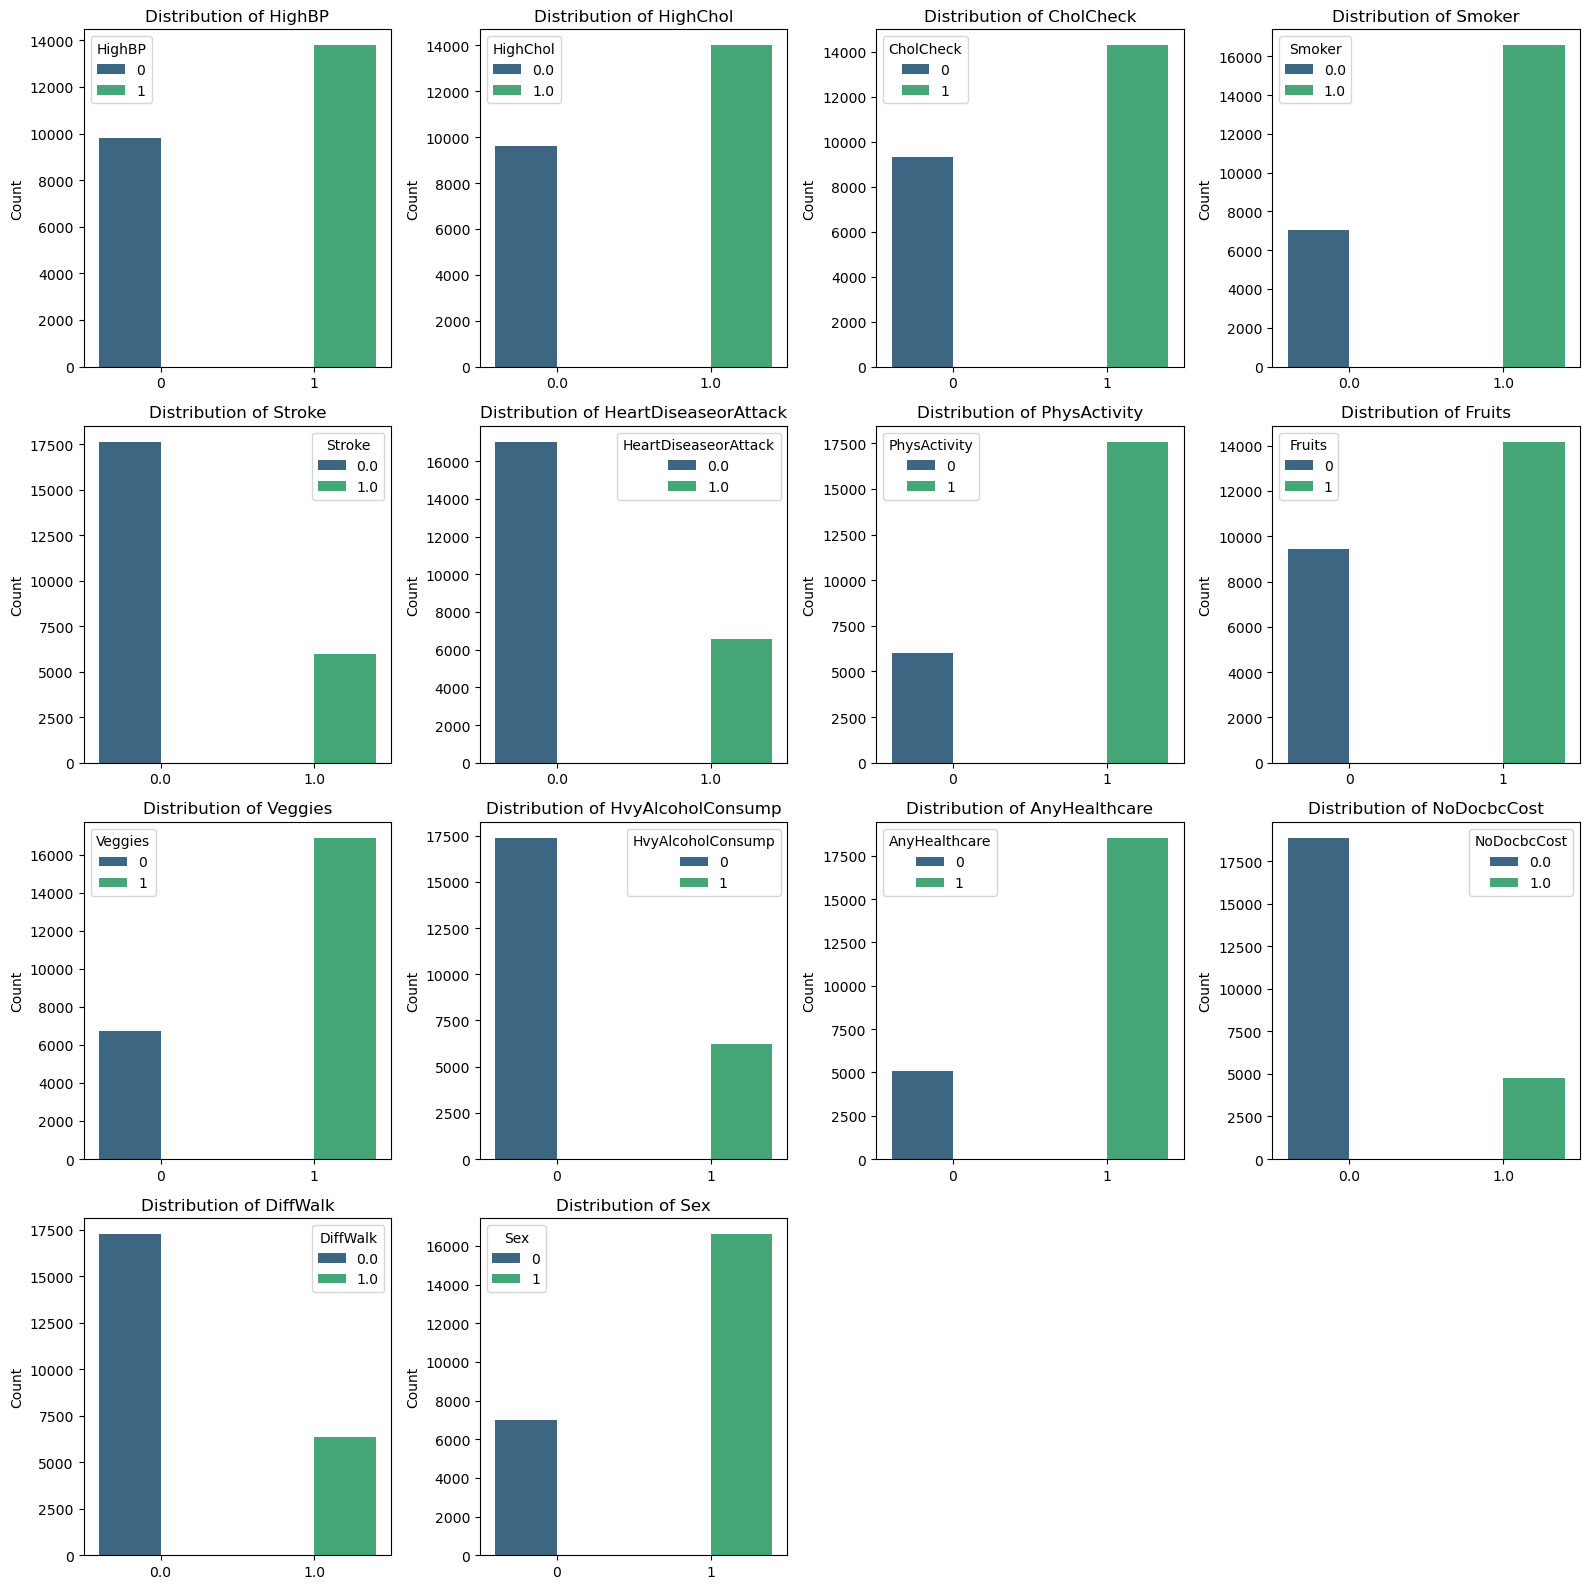

In [168]:
# Validate balancing
# Number of columns and rows
n_cols = 4
n_rows = (len(binary_cols) + n_cols - 1) // n_cols  # Ceiling division for rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate

# Plot each binary column
for i, col in enumerate(binary_cols):
    sns.countplot(x=col, data=patient_df, ax=axes[i], hue=col, palette='viridis')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')  # Hide unused subplots

# Adjust layout and display
plt.tight_layout()

# Save the figure to a JPEG file
plt.savefig("PatientVisualizations/binary_scaled_dist.jpg", format="jpeg", dpi=300)

plt.show()

#### Feature Importance of Patient Data

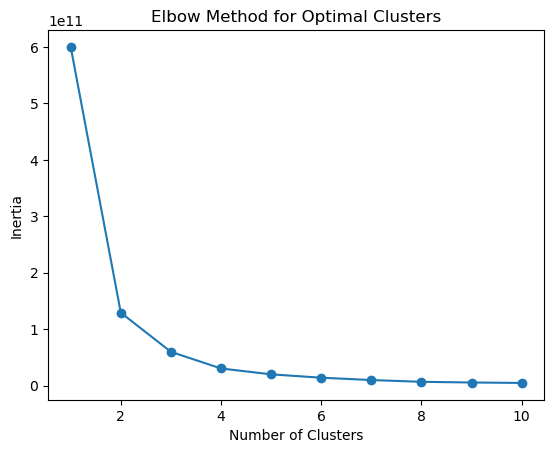

In [171]:
# Drop the 'displayTime' column
patient_df_no_time = patient_df.drop(columns=['Time Checked', 'GlucoseRank'])

# Elbow Method to find optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(patient_df_no_time)  # Use the dataframe without 'displayTime'
    inertia.append(kmeans.inertia_)

# Plot the results
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

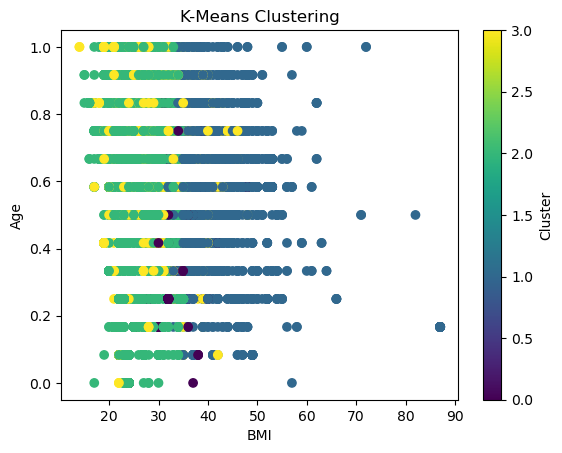

In [172]:
numeric_cols = ['BMI', 'Glucose Value']

# Separate the columns into their respective categories
binary_data = patient_df[binary_cols]
ordinal_data = patient_df[ord_cols]
numeric_data = patient_df[numeric_cols]

# Scale the numeric data
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

# Convert scaled numeric data to a DataFrame
numeric_data_scaled_df = pd.DataFrame(numeric_data_scaled, columns=numeric_cols, index=patient_df.index)

# Combine all preprocessed data
preprocessed_data = pd.concat([binary_data, ordinal_data, numeric_data_scaled_df], axis=1)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Example: 3 clusters
clusters = kmeans.fit_predict(preprocessed_data)

# Add the cluster labels back to the original dataframe
patient_df['Cluster'] = clusters

# Visualize the results
plt.scatter(patient_df['BMI'], patient_df['Age'], c=patient_df['Cluster'], cmap='viridis')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()

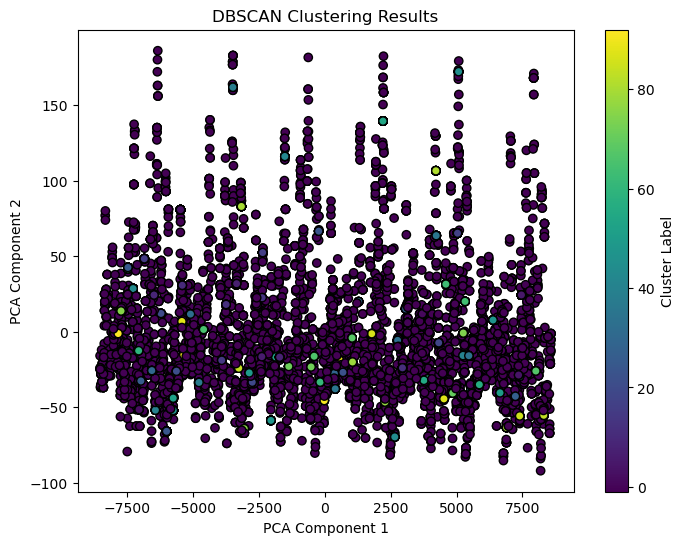

In [173]:
# Sample to reduce computation speed
patient_df_sample = patient_df_no_time.sample(n=10000)

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
reduced_df = pca.fit_transform(patient_df_sample)

# Fit DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10) 
cluster_labels = dbscan.fit_predict(reduced_df)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(
    reduced_df[:, 0], 
    reduced_df[:, 1], 
    c=cluster_labels, 
    cmap='viridis', 
    marker='o',
    edgecolor='k'
)
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

Both Clustering methods above, K-nn and DBSCAN, are not too helpful in determining how the features can be recognized. However, when we recognize that most variables are a binary 0 or 1, this lack of clusters makes sense. There is no way for these clustering methods to determine which 1's or 0's recorded are related to others. Ultimately, feature selection will be determined with domain knowledge and only the necessary information to be input into the food recommendation system.

To begin, recommendations are only suggested based on personalized health data. The inclusion of Time Scanned, Income, Education, NodocbcCost, AnyHealthcare, HvyAlcoholConsump, Fruits, Veggie, and Diffwalk features is not necessary to assist the predictive model in determining if a food is safe or risky to consume. Therefor, these eight features are dropped from the final dataframe.

#### Final Patient Data Frame - Ready for Modeling

In [179]:
# List of features to drop
features_to_drop = [
    'Income', 'Education', 
    'NoDocbcCost', 'AnyHealthcare', 
    'HvyAlcoholConsump', 'Fruits', 'Veggies', 'DiffWalk'
]

# Drop the features from the dataframe
patient = patient_df.drop(columns=features_to_drop)

# Check the result
patient.head()

ID  Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
13386  13386           2.0       1       1.0          0  30.0     1.0     0.0   
1748    1748           2.0       1       1.0          1  26.0     1.0     0.0   
12235  12235           2.0       0       1.0          0  38.0     1.0     0.0   
1552    1552           2.0       0       0.0          0  24.0     0.0     0.0   
11698  11698           2.0       0       1.0          1  21.0     1.0     0.0   

       HeartDiseaseorAttack  PhysActivity  GenHlth  MentHlth  PhysHlth  Sex  \
13386                   1.0             0      5.0      19.0      16.0    1   
1748                    0.0             1      4.0       0.0      15.0    1   
12235                   0.0             0      4.0      30.0      30.0    1   
1552                    0.0             1      2.0       0.0      10.0    1   
11698                   1.0             1      3.0       0.0       0.0    0   

            Age  Glucose Value         Time Checked GlucoseRank  Cluster  
13386  0.333333             96  2024-09-19T18:28:15        Norm        2  
1748   1.000000            138  2024-10-30T12:38:16        High        2  
12235  0.833333            148  2024-09-23T18:23:26        High        1  
1552   0.833333             99  2024-10-31T04:58:18        Norm        2  
11698  0.750000            161  2024-09-25T15:08:29        High        2

In [181]:
# Save the Preprocessed DataFrame as a CSV file in repo
data_dir = './preprocessed_data/'
patient.to_csv(data_dir + 'patient_df.csv', index=False)